In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
from tqdm.auto import tqdm

In [2]:
data_dir = os.path.join('drive', 'MyDrive', 'data')

# IMPORTING PREVIOUSLY TRAINED MODELS

In [3]:
from tensorflow.keras.models import load_model

ResNet50_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_70epoch_newtransitiontiles.h5'))
ENV2S_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_V2.h5'))
VGG16_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch_V2.h5'))
DenseNet121_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_200epoch_newtransitiontiles.h5'))

ENV2S_model_20by20_fourier = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_FT.h5'))
model_20by20_fourier = load_model(os.path.join(data_dir, 'imageclassifier_3classes_model_20x20_70epoch_FT.h5'))

#DenseNet121_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_120epoch_SR_V2.h5'))

ResNet50_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_80epoch_SR.h5'))
VGG16_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch_SR.h5'))
ENV2S_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_SR.h5'))
DenseNet121_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_120epoch_SR_V2.h5'))

# FILES LIST

In [ ]:
file_list_not_ripples = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'not_ripples'))
file_list_transition = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'transition'))
file_list_ripples = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'ripples'))

# Data with ripples

In [ ]:
d = {'col1': ['File name'],
     'col2': ['result'], 'ResNet50': ['Ripple?'],
     'col4': ['result'], 'ENV2S': ['Ripple?'],
     'col6': ['result'], 'VGG16': ['Ripple?'],
     'col8': ['result'], 'DenseNet121': ['Ripple?'],
     'col10': ['blank'],
     'col12': ['result'], 'ENV2S_ft': ['Ripple?'],
     'col14': ['result'], 'model_ft': ['Ripple?'],
     'col20': ['result'], 'DenseNet121_SR': ['Ripple?']}
df_final_classification_ripples = pd.DataFrame(data=d)

f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'ResNet50_SR_NR': ['Not_ripples'], 'ResNet50_SR_T': ['Transition'], 'ResNet50_SR_R': ['Ripples'],
     'VGG16_SR_NR': ['Not_ripples'], 'VGG16_SR_T': ['Transition'], 'VGG16_SR_R': ['Ripples'],
     'ENV2S_SR_NR': ['Not_ripples'], 'ENV2S_SR_T': ['Transition'], 'ENV2S_SR_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty_ripples = pd.DataFrame(data=f)

In [ ]:
cm = plt.cm.viridis

for row in range(len(file_list_ripples)):
  name = file_list_ripples[row]
  splitted = name.split("_")
  #if splitted[4] == 'line01.png':
  img = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'ripples', name))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_ft = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'fourier', 'ripples', name))
  img_ft_rgb = cv2.cvtColor(img_ft, cv2.COLOR_BGR2RGB)
  #mosaic_1chan = img_rgb[:,:,0] + img_rgb[:,:,1] + img_rgb[:,:,2]
  #ft = np.fft.ifftshift(mosaic_1chan)
  #ft = np.fft.fft2(ft)
  #ft_ripples = np.fft.fftshift(ft)

  #ft_ripples_clipped = ft_ripples.clip(max=abs(np.percentile(ft_ripples, 100))/40)#8)

  #Transform scalar-data to four dimensional RGBA matrix (the fourth dimension is alpha)
  #norm = plt.Normalize(vmin=abs(ft_ripples_clipped).min(), vmax=abs(ft_ripples_clipped).max())
  #rgb_data = cm(norm(abs(ft_ripples_clipped)))
  #rgb_data = rgb_data[:,:,:3]
  #rgb_data = rgb_data*255
  #rgb_data = rgb_data.astype('uint8')

  #Attribute image
  img_attr = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'attribute', 'ripples', name))
  img_attr = cv2.cvtColor(img_attr, cv2.COLOR_BGR2RGB)
#-------------First classification-------------
  ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ResNet50_pred = np.argmax(ResNet50)
  if ResNet50_pred == 0:
    ResNet50_result = 'NO'
  if ResNet50_pred == 1:
    ResNet50_result = 'T'
  if ResNet50_pred == 2:
    ResNet50_result = 'YES'

  ENV2S = ENV2S_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ENV2S_pred = np.argmax(ENV2S)
  if ENV2S_pred == 0:
    ENV2S_result = 'NO'
  if ENV2S_pred == 1:
    ENV2S_result = 'T'
  if ENV2S_pred == 2:
    ENV2S_result = 'YES'

  VGG16 = VGG16_model_20by20.predict(np.expand_dims(img_rgb, 0))
  VGG16_pred = np.argmax(VGG16)
  if VGG16_pred == 0:
    VGG16_result = 'NO'
  if VGG16_pred == 1:
    VGG16_result = 'T'
  if VGG16_pred == 2:
    VGG16_result = 'YES'

  DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(img_rgb, 0))
  DenseNet121_pred = np.argmax(DenseNet121)
  if DenseNet121_pred == 0:
    DenseNet121_result = 'NO'
  if DenseNet121_pred == 1:
    DenseNet121_result = 'T'
  if DenseNet121_pred == 2:
    DenseNet121_result = 'YES'

#-------------Fourier classification-------------
  ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
  if ENV2S_fourier_pred == 0:
    ENV2S_fourier_result = 'NO'
  if ENV2S_fourier_pred == 1:
    ENV2S_fourier_result = 'T'
  if ENV2S_fourier_pred == 2:
    ENV2S_fourier_result = 'YES'

  model_fourier = model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  model_fourier_pred = np.argmax(model_fourier)
  if model_fourier_pred == 0:
    model_fourier_result = 'NO'
  if model_fourier_pred == 1:
    model_fourier_result = 'T'
  if model_fourier_pred == 2:
    model_fourier_result = 'YES'

#-------------Attribute classification-------------
  ResNet50_SR = ResNet50_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  ResNet50_SR_pred = np.argmax(ResNet50_SR)
  if ResNet50_SR_pred == 0:
    ResNet50_SR_result = 'NO'
  if ResNet50_SR_pred == 1:
    ResNet50_SR_result = 'T'
  if ResNet50_SR_pred == 2:
    ResNet50_SR_result = 'YES'

  VGG16_SR = VGG16_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  VGG16_SR_pred = np.argmax(VGG16_SR)
  if VGG16_SR_pred == 0:
    VGG16_SR_result = 'NO'
  if VGG16_SR_pred == 1:
    VGG16_SR_result = 'T'
  if VGG16_SR_pred == 2:
    VGG16_SR_result = 'YES'

  ENV2S_SR = ENV2S_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  ENV2S_SR_pred = np.argmax(ENV2S_SR)
  if ENV2S_SR_pred == 0:
    ENV2S_SR_result = 'NO'
  if ENV2S_SR_pred == 1:
    ENV2S_SR_result = 'T'
  if ENV2S_SR_pred == 2:
    ENV2S_SR_result = 'YES'

  DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
  if DenseNet121_SR_pred == 0:
    DenseNet121_SR_result = 'NO'
  if DenseNet121_SR_pred == 1:
    DenseNet121_SR_result = 'T'
  if DenseNet121_SR_pred == 2:
    DenseNet121_SR_result = 'YES'

  print(row)
  df_final_classification_ripples.loc[len(df_final_classification_ripples.index)] = [name,
                                                                                    ResNet50[0][ResNet50_pred], ResNet50_result,
                                                                                    ENV2S[0][ENV2S_pred], ENV2S_result,
                                                                                    VGG16[0][VGG16_pred], VGG16_result,
                                                                                    DenseNet121[0][DenseNet121_pred], DenseNet121_result,
                                                                                    '---',
                                                                                    ENV2S_fourier[0][ENV2S_fourier_pred], ENV2S_fourier_result,
                                                                                    model_fourier[0][model_fourier_pred], model_fourier_result,
                                                                                    DenseNet121_SR[0][DenseNet121_SR_pred], DenseNet121_SR_result]
  df_final_certainty_ripples.loc[len(df_final_certainty_ripples.index)] = [name,
                                                                           ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                                           ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                                           VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                                           DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                                           ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                                           model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                                           ResNet50_SR[0,0], ResNet50_SR[0,1], ResNet50_SR[0,2],
                                                                           VGG16_SR[0,0], VGG16_SR[0,1], VGG16_SR[0,2],
                                                                           ENV2S_SR[0,0], ENV2S_SR[0,1], ENV2S_SR[0,2],
                                                                           DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step
853
1/1 [==============================] - 0s 34ms/step
854
1/1 [==============================] - 0s 61ms/step
855
1/1 [==============================] - 0s 49ms/step
856
1/1 [==============================] - 0s 45ms/step
857
1/1 [==============================] - 0s 34ms/step
858
1/1 [==============================] - 0s 36ms/step
859
1/1 [==============================] - 0s 41ms/step
860
1/1 [==============================] - 0s 41ms/step
861
1/1 [==============================] - 0s 40ms/step
862
1/1 [==============================] - 0s 61ms/step
863
1/1 [==============================] - 0s 57ms/step
864
1/1 [==============================] - 0s 38ms/step
865
1/1 [==============================] - 0s 35ms/step
866
1/1 [==============================] - 0s 33ms/step
867
1/1 [==============================] - 0s 32ms/step
868
1/1 [==============================] - 0s 35ms/step
8

In [ ]:
df_final_classification_ripples.to_csv(os.path.join(data_dir, 'final_classifications', 'df_final_classification_ripples_new_SR_models.txt'), index=False)
df_final_certainty_ripples.to_csv(os.path.join(data_dir, 'final_classifications', 'df_final_certainty_ripples_new_SR_models.txt'), index=False)

In [ ]:
df_final_classification_ripples

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_2600_column_3800_line02.png,0.994343,YES,0.989886,YES,0.997748,YES,0.540704,T,---,0.964115,YES,0.993649,YES,0.958214,YES
2,row_2650_column_3450_line02.png,0.997351,YES,0.998764,YES,0.999533,YES,0.987234,YES,---,0.985301,YES,0.999185,YES,0.979351,YES
3,row_2650_column_3500_line02.png,0.998255,YES,0.994177,YES,0.999151,YES,0.879041,YES,---,0.996386,YES,0.998353,YES,0.982315,YES
4,row_2650_column_3700_line02.png,0.832637,T,0.775087,T,0.968976,YES,0.974678,NO,---,0.724292,YES,0.881045,YES,0.98942,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,row_2600_column_3450_line02.png,0.988441,YES,0.977967,YES,0.994003,YES,0.983589,YES,---,0.993499,YES,0.970699,YES,0.991434,YES
1305,row_2600_column_3400_line02.png,0.995725,YES,0.990228,YES,0.999352,YES,0.983144,YES,---,0.996738,YES,0.709981,T,0.97947,YES
1306,row_2600_column_3650_line02.png,0.947745,YES,0.618036,T,0.809381,YES,0.880197,NO,---,0.983873,YES,0.999723,YES,0.989256,NO
1307,row_2600_column_3700_line02.png,0.98204,YES,0.978323,YES,0.965219,YES,0.696691,NO,---,0.963368,YES,0.988228,YES,0.98058,NO


# Data transition zone

In [ ]:
d = {'col1': ['File name'],
     'col2': ['result'], 'ResNet50': ['Ripple?'],
     'col4': ['result'], 'ENV2S': ['Ripple?'],
     'col6': ['result'], 'VGG16': ['Ripple?'],
     'col8': ['result'], 'DenseNet121': ['Ripple?'],
     'col10': ['blank'],
     'col12': ['result'], 'ENV2S_ft': ['Ripple?'],
     'col14': ['result'], 'model_ft': ['Ripple?'],
     'col20': ['result'], 'DenseNet121_SR': ['Ripple?']}
df_final_classification_transition = pd.DataFrame(data=d)

f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'ResNet50_SR_NR': ['Not_ripples'], 'ResNet50_SR_T': ['Transition'], 'ResNet50_SR_R': ['Ripples'],
     'VGG16_SR_NR': ['Not_ripples'], 'VGG16_SR_T': ['Transition'], 'VGG16_SR_R': ['Ripples'],
     'ENV2S_SR_NR': ['Not_ripples'], 'ENV2S_SR_T': ['Transition'], 'ENV2S_SR_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty_transition = pd.DataFrame(data=f)

In [ ]:
cm = plt.cm.viridis
for row in range(len(file_list_transition)):
  name = file_list_transition[row]
  splitted = name.split("_")
  #if splitted[4] == 'line01.png':
  img = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'transition', name))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_ft = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'fourier', 'transition', name))
  img_ft_rgb = cv2.cvtColor(img_ft, cv2.COLOR_BGR2RGB)

  #Attribute image
  img_attr = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'attribute', 'transition', name))
  img_attr = cv2.cvtColor(img_attr, cv2.COLOR_BGR2RGB)
#-------------First classification-------------
  ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ResNet50_pred = np.argmax(ResNet50)
  if ResNet50_pred == 0:
    ResNet50_result = 'NO'
  if ResNet50_pred == 1:
    ResNet50_result = 'T'
  if ResNet50_pred == 2:
    ResNet50_result = 'YES'

  ENV2S = ENV2S_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ENV2S_pred = np.argmax(ENV2S)
  if ENV2S_pred == 0:
    ENV2S_result = 'NO'
  if ENV2S_pred == 1:
    ENV2S_result = 'T'
  if ENV2S_pred == 2:
    ENV2S_result = 'YES'

  VGG16 = VGG16_model_20by20.predict(np.expand_dims(img_rgb, 0))
  VGG16_pred = np.argmax(VGG16)
  if VGG16_pred == 0:
    VGG16_result = 'NO'
  if VGG16_pred == 1:
    VGG16_result = 'T'
  if VGG16_pred == 2:
    VGG16_result = 'YES'

  DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(img_rgb, 0))
  DenseNet121_pred = np.argmax(DenseNet121)
  if DenseNet121_pred == 0:
    DenseNet121_result = 'NO'
  if DenseNet121_pred == 1:
    DenseNet121_result = 'T'
  if DenseNet121_pred == 2:
    DenseNet121_result = 'YES'

#-------------Fourier classification-------------
  ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
  if ENV2S_fourier_pred == 0:
    ENV2S_fourier_result = 'NO'
  if ENV2S_fourier_pred == 1:
    ENV2S_fourier_result = 'T'
  if ENV2S_fourier_pred == 2:
    ENV2S_fourier_result = 'YES'

  model_fourier = model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  model_fourier_pred = np.argmax(model_fourier)
  if model_fourier_pred == 0:
    model_fourier_result = 'NO'
  if model_fourier_pred == 1:
    model_fourier_result = 'T'
  if model_fourier_pred == 2:
    model_fourier_result = 'YES'

#-------------Attribute classification-------------
  ResNet50_SR = ResNet50_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  ResNet50_SR_pred = np.argmax(ResNet50_SR)
  if ResNet50_SR_pred == 0:
    ResNet50_SR_result = 'NO'
  if ResNet50_SR_pred == 1:
    ResNet50_SR_result = 'T'
  if ResNet50_SR_pred == 2:
    ResNet50_SR_result = 'YES'

  VGG16_SR = VGG16_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  VGG16_SR_pred = np.argmax(VGG16_SR)
  if VGG16_SR_pred == 0:
    VGG16_SR_result = 'NO'
  if VGG16_SR_pred == 1:
    VGG16_SR_result = 'T'
  if VGG16_SR_pred == 2:
    VGG16_SR_result = 'YES'

  ENV2S_SR = ENV2S_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  ENV2S_SR_pred = np.argmax(ENV2S_SR)
  if ENV2S_SR_pred == 0:
    ENV2S_SR_result = 'NO'
  if ENV2S_SR_pred == 1:
    ENV2S_SR_result = 'T'
  if ENV2S_SR_pred == 2:
    ENV2S_SR_result = 'YES'

  DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
  if DenseNet121_SR_pred == 0:
    DenseNet121_SR_result = 'NO'
  if DenseNet121_SR_pred == 1:
    DenseNet121_SR_result = 'T'
  if DenseNet121_SR_pred == 2:
    DenseNet121_SR_result = 'YES'

  print(row)
  df_final_classification_transition.loc[len(df_final_classification_transition.index)] = [name,
                                                                                          ResNet50[0][ResNet50_pred], ResNet50_result,
                                                                                          ENV2S[0][ENV2S_pred], ENV2S_result,
                                                                                          VGG16[0][VGG16_pred], VGG16_result,
                                                                                          DenseNet121[0][DenseNet121_pred], DenseNet121_result,
                                                                                          '---',
                                                                                          ENV2S_fourier[0][ENV2S_fourier_pred], ENV2S_fourier_result,
                                                                                          model_fourier[0][model_fourier_pred], model_fourier_result,
                                                                                          DenseNet121_SR[0][DenseNet121_SR_pred], DenseNet121_SR_result]
  df_final_certainty_transition.loc[len(df_final_certainty_transition.index)] = [name,
                                                                                 ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                                                 ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                                                 VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                                                 DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                                                 ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                                                 model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                                                 ResNet50_SR[0,0], ResNet50_SR[0,1], ResNet50_SR[0,2],
                                                                                 VGG16_SR[0,0], VGG16_SR[0,1], VGG16_SR[0,2],
                                                                                 ENV2S_SR[0,0], ENV2S_SR[0,1], ENV2S_SR[0,2],
                                                                                 DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

In [ ]:
df_final_classification_transition.to_csv(os.path.join(data_dir, 'final_classifications', 'df_final_classification_transition_new_SR_models.txt'), index=False)
df_final_certainty_transition.to_csv(os.path.join(data_dir, 'final_classifications', 'df_final_certainty_transition_new_SR_models.txt'), index=False)

In [ ]:
df_final_classification_transition

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_300_column_1550_line02.png,0.821137,YES,0.784864,YES,0.506565,NO,0.85986,NO,---,0.767873,T,0.786376,YES,0.899974,YES
2,row_300_column_1600_line02.png,0.562908,T,0.877892,YES,0.968715,T,0.842096,NO,---,0.651865,T,0.96715,T,0.841913,YES
3,row_300_column_1650_line02.png,0.511568,YES,0.759983,NO,0.458549,T,0.996646,NO,---,0.93653,NO,0.84155,YES,0.924174,NO
4,row_300_column_1700_line02.png,0.514167,T,0.806075,NO,0.914752,NO,0.997407,NO,---,0.998078,NO,0.9543,T,0.809976,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,row_850_column_500_line01.png,0.484925,NO,0.83964,T,0.828693,NO,0.999263,NO,---,0.919131,YES,0.999858,YES,0.51717,T
648,row_900_column_1050_line01.png,0.568726,T,0.973284,T,0.96657,T,0.992261,NO,---,0.502351,T,0.993585,YES,0.864672,NO
649,row_900_column_550_line01.png,0.613668,NO,0.795588,T,0.619041,T,0.674734,NO,---,0.50634,T,0.998792,YES,0.740862,T
650,row_900_column_600_line01.png,0.857848,T,0.8322,NO,0.975174,T,0.960567,NO,---,0.789608,YES,0.939044,YES,0.910779,YES


# Data with no ripples

In [ ]:
d = {'col1': ['File name'],
     'col2': ['result'], 'ResNet50': ['Ripple?'],
     'col4': ['result'], 'ENV2S': ['Ripple?'],
     'col6': ['result'], 'VGG16': ['Ripple?'],
     'col8': ['result'], 'DenseNet121': ['Ripple?'],
     'col10': ['blank'],
     'col12': ['result'], 'ENV2S_ft': ['Ripple?'],
     'col14': ['result'], 'model_ft': ['Ripple?'],
     'col16': ['result'], 'ResNet50_SR': ['Ripple?'],
     'col18': ['result'], 'VGG16_SR': ['Ripple?'],
     'col20': ['result'], 'ENV2S_SR': ['Ripple?'],
     'col22': ['result'], 'DenseNet121_SR': ['Ripple?']}
df_final_classification_not_ripples = pd.DataFrame(data=d)

f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'ResNet50_SR_NR': ['Not_ripples'], 'ResNet50_SR_T': ['Transition'], 'ResNet50_SR_R': ['Ripples'],
     'VGG16_SR_NR': ['Not_ripples'], 'VGG16_SR_T': ['Transition'], 'VGG16_SR_R': ['Ripples'],
     'ENV2S_SR_NR': ['Not_ripples'], 'ENV2S_SR_T': ['Transition'], 'ENV2S_SR_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty_not_ripples = pd.DataFrame(data=f)

In [ ]:
for row in range(len(file_list_not_ripples)):
  name = file_list_not_ripples[row]
  splitted = name.split("_")
  #if splitted[4] == 'line01.png':
  img = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'not_ripples', name))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_ft = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'fourier', 'not_ripples', name))
  img_ft_rgb = cv2.cvtColor(img_ft, cv2.COLOR_BGR2RGB)

  #Attribute image
  img_attr = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'attribute', 'not_ripples', name))
  img_attr = cv2.cvtColor(img_attr, cv2.COLOR_BGR2RGB)
#-------------First classification-------------
  ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ResNet50_pred = np.argmax(ResNet50)
  if ResNet50_pred == 0:
    ResNet50_result = 'NO'
  if ResNet50_pred == 1:
    ResNet50_result = 'T'
  if ResNet50_pred == 2:
    ResNet50_result = 'YES'

  ENV2S = ENV2S_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ENV2S_pred = np.argmax(ENV2S)
  if ENV2S_pred == 0:
    ENV2S_result = 'NO'
  if ENV2S_pred == 1:
    ENV2S_result = 'T'
  if ENV2S_pred == 2:
    ENV2S_result = 'YES'

  VGG16 = VGG16_model_20by20.predict(np.expand_dims(img_rgb, 0))
  VGG16_pred = np.argmax(VGG16)
  if VGG16_pred == 0:
    VGG16_result = 'NO'
  if VGG16_pred == 1:
    VGG16_result = 'T'
  if VGG16_pred == 2:
    VGG16_result = 'YES'

  DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(img_rgb, 0))
  DenseNet121_pred = np.argmax(DenseNet121)
  if DenseNet121_pred == 0:
    DenseNet121_result = 'NO'
  if DenseNet121_pred == 1:
    DenseNet121_result = 'T'
  if DenseNet121_pred == 2:
    DenseNet121_result = 'YES'

#-------------Fourier classification-------------
  ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
  if ENV2S_fourier_pred == 0:
    ENV2S_fourier_result = 'NO'
  if ENV2S_fourier_pred == 1:
    ENV2S_fourier_result = 'T'
  if ENV2S_fourier_pred == 2:
    ENV2S_fourier_result = 'YES'

  model_fourier = model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  model_fourier_pred = np.argmax(model_fourier)
  if model_fourier_pred == 0:
    model_fourier_result = 'NO'
  if model_fourier_pred == 1:
    model_fourier_result = 'T'
  if model_fourier_pred == 2:
    model_fourier_result = 'YES'

#-------------Attribute classification-------------
  ResNet50_SR = ResNet50_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  ResNet50_SR_pred = np.argmax(ResNet50_SR)
  if ResNet50_SR_pred == 0:
    ResNet50_SR_result = 'NO'
  if ResNet50_SR_pred == 1:
    ResNet50_SR_result = 'T'
  if ResNet50_SR_pred == 2:
    ResNet50_SR_result = 'YES'

  VGG16_SR = VGG16_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  VGG16_SR_pred = np.argmax(VGG16_SR)
  if VGG16_SR_pred == 0:
    VGG16_SR_result = 'NO'
  if VGG16_SR_pred == 1:
    VGG16_SR_result = 'T'
  if VGG16_SR_pred == 2:
    VGG16_SR_result = 'YES'

  ENV2S_SR = ENV2S_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  ENV2S_SR_pred = np.argmax(ENV2S_SR)
  if ENV2S_SR_pred == 0:
    ENV2S_SR_result = 'NO'
  if ENV2S_SR_pred == 1:
    ENV2S_SR_result = 'T'
  if ENV2S_SR_pred == 2:
    ENV2S_SR_result = 'YES'

  DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
  if DenseNet121_SR_pred == 0:
    DenseNet121_SR_result = 'NO'
  if DenseNet121_SR_pred == 1:
    DenseNet121_SR_result = 'T'
  if DenseNet121_SR_pred == 2:
    DenseNet121_SR_result = 'YES'

  print(row)
  df_final_classification_not_ripples.loc[len(df_final_classification_not_ripples.index)] = [name,
                                                                                            ResNet50[0][ResNet50_pred], ResNet50_result,
                                                                                            ENV2S[0][ENV2S_pred], ENV2S_result,
                                                                                            VGG16[0][VGG16_pred], VGG16_result,
                                                                                            DenseNet121[0][DenseNet121_pred], DenseNet121_result,
                                                                                            '---',
                                                                                            ENV2S_fourier[0][ENV2S_fourier_pred], ENV2S_fourier_result,
                                                                                            model_fourier[0][model_fourier_pred], model_fourier_result,
                                                                                            ResNet50_SR[0][ResNet50_SR_pred], ResNet50_SR_result,
                                                                                            VGG16_SR[0][VGG16_SR_pred], VGG16_SR_result,
                                                                                            ENV2S_SR[0][ENV2S_SR_pred], ENV2S_SR_result,
                                                                                            DenseNet121_SR[0][DenseNet121_SR_pred], DenseNet121_SR_result]
  df_final_certainty_not_ripples.loc[len(df_final_certainty_not_ripples.index)] = [name,
                                                                                    ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                                                    ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                                                    VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                                                    DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                                                    ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                                                    model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                                                    ResNet50_SR[0,0], ResNet50_SR[0,1], ResNet50_SR[0,2],
                                                                                    VGG16_SR[0,0], VGG16_SR[0,1], VGG16_SR[0,2],
                                                                                    ENV2S_SR[0,0], ENV2S_SR[0,1], ENV2S_SR[0,2],
                                                                                    DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

In [ ]:
df_final_classification_not_ripples.to_csv(os.path.join(data_dir, 'final_classifications', 'df_final_classification_not_ripples_pt1&2_new_SR_models.txt'), index=False)
df_final_certainty_not_ripples.to_csv(os.path.join(data_dir, 'final_classifications', 'df_final_certainty_not_ripples_pt1&2_new_SR_models.txt'), index=False)

In [ ]:
df_final_classification_not_ripples

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_6050_column_4900_line03.png,0.976712,NO,0.99865,NO,0.999521,NO,0.999577,NO,---,0.872671,NO,0.898248,T,0.994908,NO
2,row_6050_column_5000_line03.png,0.979234,NO,0.999745,NO,0.995227,NO,0.997867,NO,---,0.968918,NO,0.568058,NO,0.993326,NO
3,row_6050_column_5050_line03.png,0.986233,NO,0.999012,NO,0.977772,NO,0.996472,NO,---,0.851604,NO,0.878569,NO,0.993163,NO
4,row_6050_column_5100_line03.png,0.956745,NO,0.999314,NO,0.937795,NO,0.996582,NO,---,0.983629,NO,0.936496,NO,0.993272,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,row_6000_column_5050_line03.png,0.969824,NO,0.999443,NO,0.883779,NO,0.982069,NO,---,0.980207,NO,0.992677,NO,0.993157,NO
1888,row_6000_column_5100_line03.png,0.99628,NO,0.998816,NO,0.705421,T,0.977027,NO,---,0.993222,NO,0.943328,NO,0.993825,NO
1889,row_6000_column_5300_line03.png,0.954748,NO,0.998517,NO,0.99864,NO,0.994207,NO,---,0.962261,NO,0.990427,NO,0.99121,NO
1890,row_6000_column_5350_line03.png,0.993462,NO,0.999544,NO,0.991261,NO,0.998571,NO,---,0.994023,NO,0.9996,NO,0.993724,NO


# CREATE Y_TRUE TRUE VALUE LIST

In [ ]:
a = ["YES" for x in range(len(file_list_ripples))]
b = ["T" for x in range(len(file_list_transition))]
c = ["NO" for x in range(len(file_list_not_ripples))]
d = np.concatenate((a,b,c))

# CREATE Y_PRED VALUES OF PREDICTION

Ripples

In [ ]:
ResNet_final_pred = df_final_classification_ripples['ResNet50'].values
ENV2S_final_pred = df_final_classification_ripples['ENV2S'].values
VGG16_final_pred = df_final_classification_ripples['VGG16'].values
DenseNet_final_pred = df_final_classification_ripples['DenseNet121'].values
ENV2S_FT_final_pred = df_final_classification_ripples['ENV2S_ft'].values
ResNet50_FT_final_pred = df_final_classification_ripples['model_ft'].values
DenseNet_SR_final_pred = df_final_classification_ripples['DenseNet121_SR'].values

ResNet_final_pred = ResNet_final_pred[1:]
ENV2S_final_pred = ENV2S_final_pred[1:]
VGG16_final_pred = VGG16_final_pred[1:]
DenseNet_final_pred = DenseNet_final_pred[1:]
ENV2S_FT_final_pred = ENV2S_FT_final_pred[1:]
ResNet50_FT_final_pred = ResNet50_FT_final_pred[1:]
DenseNet_SR_final_pred = DenseNet_SR_final_pred[1:]

Transition

In [ ]:
ResNet_final_pred_transition = df_final_classification_transition['ResNet50'].values
ENV2S_final_pred_transition = df_final_classification_transition['ENV2S'].values
VGG16_final_pred_transition = df_final_classification_transition['VGG16'].values
DenseNet_final_pred_transition = df_final_classification_transition['DenseNet121'].values
ENV2S_FT_final_pred_transition = df_final_classification_transition['ENV2S_ft'].values
ResNet50_FT_final_pred_transition = df_final_classification_transition['model_ft'].values
DenseNet_SR_final_pred_transition = df_final_classification_transition['DenseNet121_SR'].values

ResNet_final_pred_transition = ResNet_final_pred_transition[1:]
ENV2S_final_pred_transition = ENV2S_final_pred_transition[1:]
VGG16_final_pred_transition = VGG16_final_pred_transition[1:]
DenseNet_final_pred_transition = DenseNet_final_pred_transition[1:]
ENV2S_FT_final_pred_transition = ENV2S_FT_final_pred_transition[1:]
ResNet50_FT_final_pred_transition = ResNet50_FT_final_pred_transition[1:]
DenseNet_SR_final_pred_transition = DenseNet_SR_final_pred_transition[1:]

Not ripples

In [ ]:
ResNet_final_pred_not_ripples = df_final_classification_not_ripples['ResNet50'].values
ENV2S_final_pred_not_ripples = df_final_classification_not_ripples['ENV2S'].values
VGG16_final_pred_not_ripples = df_final_classification_not_ripples['VGG16'].values
DenseNet_final_pred_not_ripples = df_final_classification_not_ripples['DenseNet121'].values
ENV2S_FT_final_pred_not_ripples = df_final_classification_not_ripples['ENV2S_ft'].values
ResNet50_FT_final_pred_not_ripples = df_final_classification_not_ripples['model_ft'].values
DenseNet_SR_final_pred_not_ripples = df_final_classification_not_ripples['DenseNet121_SR'].values

ResNet_final_pred_not_ripples = ResNet_final_pred_not_ripples[1:]
ENV2S_final_pred_not_ripples = ENV2S_final_pred_not_ripples[1:]
VGG16_final_pred_not_ripples = VGG16_final_pred_not_ripples[1:]
DenseNet_final_pred_not_ripples = DenseNet_final_pred_not_ripples[1:]
ENV2S_FT_final_pred_not_ripples = ENV2S_FT_final_pred_not_ripples[1:]
ResNet50_FT_final_pred_not_ripples = ResNet50_FT_final_pred_not_ripples[1:]
DenseNet_SR_final_pred_not_ripples = DenseNet_SR_final_pred_not_ripples[1:]

Concatenate all three classes

In [ ]:
ResNet_final = np.concatenate((ResNet_final_pred, ResNet_final_pred_transition, ResNet_final_pred_not_ripples))
ENV2S_final = np.concatenate((ENV2S_final_pred, ENV2S_final_pred_transition, ENV2S_final_pred_not_ripples))
VGG16_final = np.concatenate((VGG16_final_pred, VGG16_final_pred_transition, VGG16_final_pred_not_ripples))
DenseNet_final = np.concatenate((DenseNet_final_pred, DenseNet_final_pred_transition, DenseNet_final_pred_not_ripples))
ENV2S_FT_final = np.concatenate((ENV2S_FT_final_pred, ENV2S_FT_final_pred_transition, ENV2S_FT_final_pred_not_ripples))
ResNet50_FT_final = np.concatenate((ResNet50_FT_final_pred, ResNet50_FT_final_pred_transition, ResNet50_FT_final_pred_not_ripples))
DenseNet_SR_final = np.concatenate((DenseNet_SR_final_pred, DenseNet_SR_final_pred_transition, DenseNet_SR_final_pred_not_ripples))

# CALULATE CONFUSION MATRIX

In [ ]:
confusion_ResNet=confusion_matrix(d, ResNet_final, normalize='true')
confusion_ENV2S=confusion_matrix(d, ENV2S_final, normalize='true')
confusion_VGG16=confusion_matrix(d, VGG16_final, normalize='true')
confusion_DenseNet=confusion_matrix(d, DenseNet_final, normalize='true')

confusion_ENV2S_FT=confusion_matrix(d, ENV2S_FT_final, normalize='true')
confusion_ResNet50_FT=confusion_matrix(d, ResNet50_FT_final, normalize='true')
confusion_DenseNet_SR=confusion_matrix(d, DenseNet_SR_final, normalize='true')

PLOT CONFUSION MATRIX

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

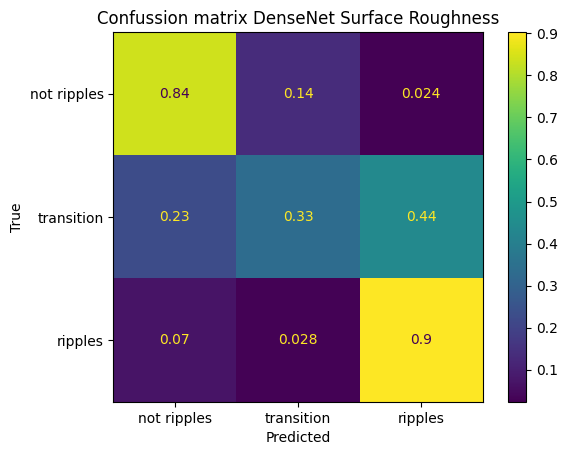

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_DenseNet_SR, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confussion matrix DenseNet Surface Roughness')
disp.ax_.set(xlabel='Predicted', ylabel='True')

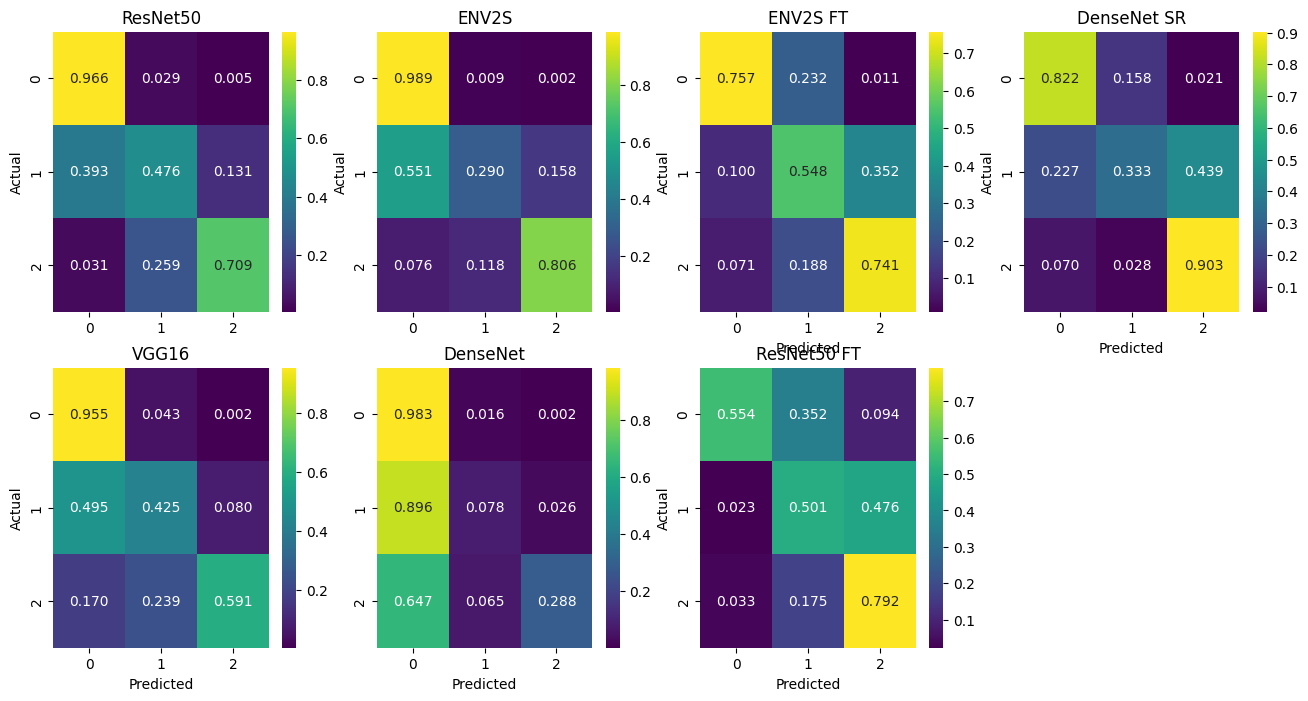

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(241)
sns.heatmap(confusion_ResNet, annot=True, cmap='viridis', fmt=".3f") #"g" para que salga sin notacion cientifica
plt.title("ResNet50")
plt.ylabel("Actual")

plt.subplot(242)
sns.heatmap(confusion_ENV2S, annot=True, cmap='viridis', fmt=".3f")
plt.title("ENV2S")
plt.ylabel("Actual")

plt.subplot(245)
sns.heatmap(confusion_VGG16, annot=True, cmap='viridis', fmt=".3f")
plt.title("VGG16")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.subplot(246)
sns.heatmap(confusion_DenseNet, annot=True, cmap='viridis', fmt=".3f")
plt.title("DenseNet")
plt.xlabel("Predicted")

plt.subplot(243)
sns.heatmap(confusion_ENV2S_FT, annot=True, cmap='viridis', fmt=".3f")
plt.title("ENV2S FT")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(247)
sns.heatmap(confusion_ResNet50_FT, annot=True, cmap='viridis', fmt=".3f")
plt.title("ResNet50 FT")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(244)
sns.heatmap(confusion_DenseNet_SR, annot=True, cmap='viridis', fmt=".3f")
plt.title("DenseNet SR")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## CLASSIFICATION OF LINE 04

# Load data

In [4]:
line_02_mosaic_raw = pd.read_csv(os.path.join(data_dir, 'Line02_Sonarwiz_mosaic_raw_data.txt'), delimiter=",")
line_02_mosaic_attribute = pd.read_csv(os.path.join(data_dir, 'Line02_Sonarwiz_mosaic_attribute_data.txt'), delimiter=",")

In [5]:
mosaic_raw = line_02_mosaic_raw.to_numpy()
mosaic_attribute = line_02_mosaic_attribute.to_numpy()

In [6]:
mosaic_raw = np.nan_to_num(mosaic_raw)
mosaic_attribute = np.nan_to_num(mosaic_attribute)

# Colormaps

In [7]:
def Color_palette():
    mstlbronze = ['#000000','#000300', '#000700', '#000B00', '#2B0F00',
                  '#2B1200', '#451600', '#451900', '#571D00', '#572000',
                  '#652300', '#652600', '#702900', '#702C00', '#7A2F00',
                  '#7A3200', '#833500', '#833700', '#8A3A00', '#8A3C00',
                  '#913F00', '#914100', '#974300', '#974600', '#9C4800',
                  '#9C4A00', '#A14C00', '#A14E00', '#A65000', '#A65200',
                  '#AA5400', '#AA5600', '#AE5800', '#AE5900', '#B25B00',
                  '#B25D00', '#B65E00', '#B66000', '#B96100', '#B96300',
                  '#BC6400', '#BC6600', '#BF6700', '#BF6800', '#C26A00',
                  '#C26B00', '#C56C00', '#C56D00', '#C86F00', '#C87000',
                  '#CA7100', '#CA7200', '#CD7300', '#CD7400', '#CF7500',
                  '#CF7600', '#D17700', '#D17800', '#D47900', '#D47A00',
                  '#D67B00', '#D67C00', '#D87D00', '#D87E00', '#DA8000',
                  '#DA8100', '#DC8200', '#DC8300', '#DE8400', '#DE8500',
                  '#DF8600', '#DF8700', '#E18800', '#E18900', '#E38A00',
                  '#E38B00', '#E58C00', '#E58D00', '#E68E00', '#E68F00',
                  '#E89100', '#E89200', '#E99300', '#E99400', '#EB9500',
                  '#EB9700', '#EC9800', '#EC9900', '#EE9B00', '#EE9C00',
                  '#EF9E00', '#EF9F00', '#F1A100', '#F1A200', '#F2A400',
                  '#F2A600', '#EFA800', '#F0A900', '#F1AB00', '#F2AD00',
                  '#F3B100', '#F4B300', '#F5B500', '#F6B700', '#F7B900',
                  '#F7BC00', '#F8BE00', '#F9C000', '#F9C300', '#FAC500',
                  '#FAC800', '#FBCB00', '#FBCD00', '#FCD000', '#FCD300',
                  '#FCD600', '#FDD900', '#FDDF00' ,'#FEE200', '#FEE600',
                  '#FEE900', '#FEED00', '#FEF000', '#FEF400', '#FEF800',
                  '#FEFC00']
    new_color_palette = ListedColormap(sns.color_palette(mstlbronze))
    return new_color_palette

cm_1 = Color_palette()
cm_2 = plt.cm.gist_rainbow
cm_3 = plt.cm.viridis
cm_4 = plt.cm.brg

# CALCULATE CERTAINTY FOR EVERY TILE OF A LINE

In [11]:
f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'ResNet50_SR_NR': ['Not_ripples'], 'ResNet50_SR_T': ['Transition'], 'ResNet50_SR_R': ['Ripples'],
     'VGG16_SR_NR': ['Not_ripples'], 'VGG16_SR_T': ['Transition'], 'VGG16_SR_R': ['Ripples'],
     'ENV2S_SR_NR': ['Not_ripples'], 'ENV2S_SR_T': ['Transition'], 'ENV2S_SR_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty = pd.DataFrame(data=f)

In [12]:
tile_size = 100
for row in tqdm(range(0,mosaic_raw.shape[0]-tile_size, int(tile_size/2))):
  for column in range(0,mosaic_raw.shape[1]-tile_size, int(tile_size/2)):
    tile = mosaic_raw[row:row+tile_size, column:column+tile_size]
    tile_attribute = mosaic_attribute[row:row+tile_size, column:column+tile_size]

    ft = np.fft.ifftshift(tile)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    tile_ft = ft.clip(max=abs(np.percentile(ft, 100))/44)

    #Transform scalar-data to four dimensional RGBA matrix (the fourth dimension is alpha)
    norm_1 = plt.Normalize(vmin=tile.min(), vmax=tile.max())
    norm_2 = plt.Normalize(vmin=tile_attribute.min(), vmax=tile_attribute.max())
    norm_3 = plt.Normalize(vmin=abs(tile_ft).min(), vmax=abs(tile_ft).max())
    rgb_data_1 = cm_1(norm_1(tile))
    rgb_data_2 = cm_2(norm_2(tile_attribute))
    rgb_data_3 = cm_3(norm_3(abs(tile_ft)))

    tile_rgb = (rgb_data_1[:,:,:3] * 255).astype('uint8')
    zero_pixels = len(np.nonzero(np.logical_and(tile_rgb[:,:,0] == 0, tile_rgb[:,:,1] == 0, tile_rgb[:,:,2] == 0))[0])
    if zero_pixels < (tile_size*tile_size * 0.5):
      tile_attribute_rgb = (rgb_data_2[:,:,:3] * 255).astype('uint8')
      tile_ft_rgb = (rgb_data_3[:,:,:3] * 255).astype('uint8')

      name ='row_%i_column_%i_line04' % (row, column)
    #-------------First classification-------------
      ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      ResNet50_pred = np.argmax(ResNet50)
      if ResNet50_pred == 0:
        ResNet50_result = 'NO'
      if ResNet50_pred == 1:
        ResNet50_result = 'T'
      if ResNet50_pred == 2:
        ResNet50_result = 'YES'

      ENV2S = ENV2S_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      ENV2S_pred = np.argmax(ENV2S)
      if ENV2S_pred == 0:
        ENV2S_result = 'NO'
      if ENV2S_pred == 1:
        ENV2S_result = 'T'
      if ENV2S_pred == 2:
        ENV2S_result = 'YES'

      VGG16 = VGG16_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      VGG16_pred = np.argmax(VGG16)
      if VGG16_pred == 0:
        VGG16_result = 'NO'
      if VGG16_pred == 1:
        VGG16_result = 'T'
      if VGG16_pred == 2:
        VGG16_result = 'YES'

      DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      DenseNet121_pred = np.argmax(DenseNet121)
      if DenseNet121_pred == 0:
        DenseNet121_result = 'NO'
      if DenseNet121_pred == 1:
        DenseNet121_result = 'T'
      if DenseNet121_pred == 2:
        DenseNet121_result = 'YES'

    #-------------Fourier classification-------------
      ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(tile_ft_rgb,0))
      ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
      if ENV2S_fourier_pred == 0:
        ENV2S_fourier_result = 'NO'
      if ENV2S_fourier_pred == 1:
        ENV2S_fourier_result = 'T'
      if ENV2S_fourier_pred == 2:
        ENV2S_fourier_result = 'YES'

      model_fourier = model_20by20_fourier.predict(np.expand_dims(tile_ft_rgb,0))
      model_fourier_pred = np.argmax(model_fourier)
      if model_fourier_pred == 0:
        model_fourier_result = 'NO'
      if model_fourier_pred == 1:
        model_fourier_result = 'T'
      if model_fourier_pred == 2:
        model_fourier_result = 'YES'

    #-------------Attribute classification-------------
      ResNet50_SR = ResNet50_model_20by20_SurfRough.predict(np.expand_dims(tile_attribute_rgb, 0))
      ResNet50_SR_pred = np.argmax(ResNet50_SR)
      if ResNet50_SR_pred == 0:
        ResNet50_SR_result = 'NO'
      if ResNet50_SR_pred == 1:
        ResNet50_SR_result = 'T'
      if ResNet50_SR_pred == 2:
        ResNet50_SR_result = 'YES'

      VGG16_SR = VGG16_model_20by20_SurfRough.predict(np.expand_dims(tile_attribute_rgb, 0))
      VGG16_SR_pred = np.argmax(VGG16_SR)
      if VGG16_SR_pred == 0:
        VGG16_SR_result = 'NO'
      if VGG16_SR_pred == 1:
        VGG16_SR_result = 'T'
      if VGG16_SR_pred == 2:
        VGG16_SR_result = 'YES'

      ENV2S_SR = ENV2S_model_20by20_SurfRough.predict(np.expand_dims(tile_attribute_rgb, 0))
      ENV2S_SR_pred = np.argmax(ENV2S_SR)
      if ENV2S_SR_pred == 0:
        ENV2S_SR_result = 'NO'
      if ENV2S_SR_pred == 1:
        ENV2S_SR_result = 'T'
      if ENV2S_SR_pred == 2:
        ENV2S_SR_result = 'YES'

      DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(tile_attribute_rgb, 0))
      DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
      if DenseNet121_SR_pred == 0:
        DenseNet121_SR_result = 'NO'
      if DenseNet121_SR_pred == 1:
        DenseNet121_SR_result = 'T'
      if DenseNet121_SR_pred == 2:
        DenseNet121_SR_result = 'YES'

      df_final_certainty.loc[len(df_final_certainty.index)] = [name,
                                                              ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                              ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                              VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                              DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                              ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                              model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                              ResNet50_SR[0,0], ResNet50_SR[0,1], ResNet50_SR[0,2],
                                                              ENV2S_SR[0,0], ENV2S_SR[0,1], ENV2S_SR[0,2],
                                                              VGG16_SR[0,0], VGG16_SR[0,1], VGG16_SR[0,2],
                                                              DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

  0%|          | 0/41 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 0s 32ms/step


# Classification of tiles using weighted averages

In [ ]:
certainty

,col1,ResNet50_NR,ResNet50_T,ResNet50_R,ENV2S_NR,ENV2S_T,ENV2S_R,VGG16_NR,VGG16_T,VGG16_R,...,DenseNet121_R,ENV2S_FT_NR,ENV2S_FT_T,ENV2S_FT_R,model_FT_NR,model_FT_T,model_FT_R,DenseNet121_SR_NR,DenseNet121_SR_T,DenseNet121_SR_R
0,File name,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,...,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples
1,row_2600_column_3800_line02.png,0.0010111768497154117,0.013111008331179619,0.9858778715133667,2.8655245841946453e-05,0.08943097293376923,0.9105403423309326,4.1202591091860086e-05,0.008247673511505127,0.9917111396789551,...,0.5808823704719543,0.0001437521423213184,0.035741474479436874,0.9641147255897522,0.00015138160961214453,0.006199815776199102,0.9936488270759583,0.012319797649979591,0.029466083273291588,0.9582141041755676
2,row_2650_column_3450_line02.png,0.0008946548914536834,0.009337560273706913,0.989767849445343,2.9352211640798487e-05,0.012217125855386257,0.9877534508705139,0.000403333455324173,0.025407515466213226,0.9741891026496887,...,0.8023126721382141,5.9990274166921154e-05,0.01463892962783575,0.9853010773658752,1.2697345255219261e-06,0.0008134624804370105,0.9991852641105652,0.001265492639504373,0.019383396953344345,0.9793510437011719
3,row_2650_column_3500_line02.png,0.00111774739343673,0.00842451211065054,0.9904577732086182,0.00043885016930289567,0.16846533119678497,0.8310958743095398,4.254799205227755e-05,0.0014453403418883681,0.9985120892524719,...,0.5790743827819824,4.856791929341853e-05,0.003565724240615964,0.9963856935501099,5.5389209592249244e-05,0.0015915455296635628,0.998353123664856,0.001308971899561584,0.01637561433017254,0.9823153614997864
4,row_2650_column_3700_line02.png,0.005989910569041967,0.3482230305671692,0.6457870006561279,0.0035741226747632027,0.5359553694725037,0.4604705572128296,0.0003796226519625634,0.06495434790849686,0.9346660375595093,...,0.07404076308012009,0.001013977569527924,0.27469295263290405,0.7242929935455322,0.00023839520872570574,0.11871734261512756,0.881044328212738,0.9894199371337891,0.007528017740696669,0.003052070504054427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,row_2600_column_3450_line02.png,0.001628946396522224,0.011241000145673752,0.9871301054954529,0.001108734984882176,0.17837640643119812,0.8205149173736572,0.00011798241757787764,0.01469303946942091,0.9851889610290527,...,0.9518904685974121,9.530327952234074e-05,0.006405381020158529,0.9934993982315063,2.7703465093509294e-05,0.029273176565766335,0.9706991314888,0.0013570869341492653,0.007208878640085459,0.9914340972900391
1305,row_2600_column_3400_line02.png,0.0008231238462030888,0.006153537891805172,0.9930232763290405,2.9553266358561814e-05,0.015174335800111294,0.9847961664199829,6.0651822423096746e-05,0.003755581798031926,0.9961836934089661,...,0.9014075994491577,2.0652498278650455e-05,0.0032415117602795362,0.9967377781867981,0.00010350868251407519,0.7099781632423401,0.28991836309432983,0.0012651849538087845,0.019264623522758484,0.9794701933860779
1306,row_2600_column_3650_line02.png,0.002675417810678482,0.06371090561151505,0.9336135983467102,0.0005174700054340065,0.28740355372428894,0.7120789885520935,7.03492623870261e-05,0.006063736509531736,0.9938659071922302,...,0.1418374925851822,8.142107253661379e-05,0.016045397147536278,0.983873188495636,4.794587312062504e-06,0.0002725105732679367,0.9997226595878601,0.9892555475234985,0.009713616222143173,0.001030846033245325
1307,row_2600_column_3700_line02.png,0.0016175926430150867,0.055202849209308624,0.9431795477867126,0.00011862885003210977,0.08591823279857635,0.9139631390571594,6.925271009095013e-05,0.010262468829751015,0.9896682500839233,...,0.24907024204730988,9.848771151155233e-05,0.03653440997004509,0.9633671641349792,1.9214608983020298e-05,0.011752983555197716,0.9882277846336365,0.98058021068573,0.013266109861433506,0.006153660360723734


In [14]:
factor = 1/3
factor_2 = 0.25

certainty = df_final_certainty

f = {'col1': ['File name'],
     '% Stage 1.1': ['result'], 'Stage 1.1': ['clasf'],
     '% Stage 1.2': ['result'], 'Stage 1.2': ['clasf'],
     '% Stage 2.1': ['result'], 'Stage 2.1': ['clasf'],
     '% Stage 2.2': ['result'], 'Stage 2.2': ['clasf'],
     '% Stage 3.1': ['result'], 'Stage 3.1': ['clasf'],
     '% Stage 3.2': ['result'], 'Stage 3.2': ['clasf'],
     '% Stage 3.3': ['result'], 'Stage 3.3': ['clasf'],
     '% combination1': ['result'], 'combination1': ['clasf'],
     '% combination2': ['result'], 'combination2': ['clasf'],
     '% combination3': ['result'], 'combination3': ['clasf'],
     '% combination4': ['result'], 'combination4': ['clasf'],
     '% NR combination4': ['result'],
     '% T combination4': ['result'],
     '% R combination4': ['result']}
final_classification_not_ripples = pd.DataFrame(data=f)


for i in range(1,certainty.shape[0]):
  #-------------WEIGHTED AVERAGES OF STAGE 1.1------------- (ResNet50 + ENV2S)
  list_stage1_1 = (np.argmax([float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ResNet50_R'])]),
                   np.argmax([float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'ENV2S_R'])]))

  confidence_stage1_1 = np.array([list_stage1_1.count(0), list_stage1_1.count(1), list_stage1_1.count(2)])

  avg_stage1_1 = np.array([np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R'])))])
  weighted_avg_stage1_1 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_stage1_1) == 1:
    weighted_avg_stage1_1[np.argmin(confidence_stage1_1)] = avg_stage1_1[np.argmin(confidence_stage1_1)] * 0.75
    position = np.argwhere(confidence_stage1_1)
    mask = confidence_stage1_1 > 0
    factor = (1 - weighted_avg_stage1_1[np.argmin(confidence_stage1_1)])/np.sum(avg_stage1_1[mask]) - 1
    weighted_avg_stage1_1[position[0][0]] = avg_stage1_1[position[0][0]] * factor + avg_stage1_1[position[0][0]]
    weighted_avg_stage1_1[position[1][0]] = avg_stage1_1[position[1][0]] * factor + avg_stage1_1[position[1][0]]

  else:
    position = np.argwhere(confidence_stage1_1 != 2)
    weighted_avg_stage1_1[position[0][0]] = avg_stage1_1[position[0][0]] * 0.5
    weighted_avg_stage1_1[position[1][0]] = avg_stage1_1[position[1][0]] * 0.5
    mask = confidence_stage1_1 < 2
    factor = (1 - weighted_avg_stage1_1[position[0][0]] - weighted_avg_stage1_1[position[1][0]])/avg_stage1_1[np.argmax(confidence_stage1_1)] - 1
    weighted_avg_stage1_1[np.argmax(confidence_stage1_1)] = avg_stage1_1[np.argmax(confidence_stage1_1)] * factor + avg_stage1_1[np.argmax(confidence_stage1_1)]

  #-------------WEIGHTED AVERAGES OF STAGE 1.2------------- (ResNet50 + ENV2S + VGG16)
  list_stage1_2 = (np.argmax([float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ResNet50_R'])]),
                   np.argmax([float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'ENV2S_R'])]),
                   np.argmax([float(certainty.at[i, 'VGG16_NR']), float(certainty.at[i, 'VGG16_T']), float(certainty.at[i, 'VGG16_R'])]))

  confidence_stage1_2 = np.array([list_stage1_2.count(0), list_stage1_2.count(1), list_stage1_2.count(2)])

  avg_stage1_2 = np.array([np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'VGG16_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'VGG16_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R']), float(certainty.at[i, 'VGG16_R'])))])
  weighted_avg_stage1_2 = np.array([0.0, 0.0, 0.0])
    
  if np.max(confidence_stage1_2) == 3:
    weighted_avg_stage1_2 = avg_stage1_2 * 0.5
    weighted_avg_stage1_2[np.argmax(confidence_stage1_2)] += sum(weighted_avg_stage1_2)
  if np.max(confidence_stage1_2) == 2:
    weighted_avg_stage1_2[np.argmin(confidence_stage1_2)] = avg_stage1_2[np.argmin(confidence_stage1_2)] * 0.5
    position = np.argwhere(confidence_stage1_2 == 1)
    weighted_avg_stage1_2[position[0][0]] = avg_stage1_2[position[0][0]] * 0.8
    weighted_avg_stage1_2[np.argmax(confidence_stage1_2)] = avg_stage1_2[np.argmax(confidence_stage1_2)] + avg_stage1_2[position[0][0]]*0.2 + avg_stage1_2[np.argmin(confidence_stage1_2)]*0.5
  else:
    weighted_avg_stage1_2 = avg_stage1_2

#-------------NORMAL AVERAGES OF STAGE 3.1------------- (ResNet50_SR + ENV2S_SR + VGG16_SR + DenseNet121_SR)
  list_stage3_1 = (np.argmax([float(certainty.at[i, 'ResNet50_SR_NR']), float(certainty.at[i, 'ResNet50_SR_T']), float(certainty.at[i, 'ResNet50_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'ENV2S_SR_NR']), float(certainty.at[i, 'ENV2S_SR_T']), float(certainty.at[i, 'ENV2S_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'VGG16_SR_NR']), float(certainty.at[i, 'VGG16_SR_T']), float(certainty.at[i, 'VGG16_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

  confidence_stage3_1 = np.array([list_stage3_1.count(0), list_stage3_1.count(1), list_stage3_1.count(2)])

  avg_stage3_1 = np.array([np.mean((float(certainty.at[i, 'ResNet50_SR_NR']), float(certainty.at[i, 'ENV2S_SR_NR']), float(certainty.at[i, 'VGG16_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_SR_T']), float(certainty.at[i, 'ENV2S_SR_T']), float(certainty.at[i, 'VGG16_SR_T']), float(certainty.at[i, 'DenseNet121_SR_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_SR_R']), float(certainty.at[i, 'ENV2S_SR_R']), float(certainty.at[i, 'VGG16_SR_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))])

#-------------WEIGHTED AVERAGES OF STAGE 3.2------------- (ResNet50_SR + ENV2S_SR + VGG16_SR)
  list_stage3_2 = (np.argmax([float(certainty.at[i, 'ResNet50_SR_NR']), float(certainty.at[i, 'ResNet50_SR_T']), float(certainty.at[i, 'ResNet50_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'ENV2S_SR_NR']), float(certainty.at[i, 'ENV2S_SR_T']), float(certainty.at[i, 'ENV2S_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'VGG16_SR_NR']), float(certainty.at[i, 'VGG16_SR_T']), float(certainty.at[i, 'VGG16_SR_R'])]))

  confidence_stage3_2 = np.array([list_stage3_2.count(0), list_stage3_2.count(1), list_stage3_2.count(2)])

  avg_stage3_2 = np.array([np.mean((float(certainty.at[i, 'ResNet50_SR_NR']), float(certainty.at[i, 'ENV2S_SR_NR']), float(certainty.at[i, 'VGG16_SR_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_SR_T']), float(certainty.at[i, 'ENV2S_SR_T']), float(certainty.at[i, 'VGG16_SR_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_SR_R']), float(certainty.at[i, 'ENV2S_SR_R']), float(certainty.at[i, 'VGG16_SR_R'])))])
  weighted_avg_stage3_2 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_stage3_2) == 2:
    weighted_avg_stage3_2[np.argmin(confidence_stage3_2)] = avg_stage3_2[np.argmin(confidence_stage3_2)] * 0.6
    position = np.argwhere(confidence_stage3_2 == 1)
    weighted_avg_stage3_2[position[0][0]] = avg_stage3_2[position[0][0]] * 0.8
    position = np.argwhere(confidence_stage3_2 == 2)
    weighted_avg_stage3_2[position[0][0]] = 1 - np.sum(weighted_avg_stage3_2)
  if np.max(confidence_stage3_2) == 1:
    weighted_avg_stage3_2 = avg_stage3_2
  else:
    position = np.argwhere(confidence_stage3_2 != 3)
    weighted_avg_stage3_2[np.argmax(confidence_stage3_2)] = avg_stage3_2[np.argmax(confidence_stage3_2)]
    weighted_avg_stage3_2[position[0][0]] = avg_stage3_2[position[0][0]] * 0.5
    weighted_avg_stage3_2[position[1][0]] = avg_stage3_2[position[1][0]] * 0.5

#-------------WEIGHTED AVERAGES OF STAGE 3.3------------- (ResNet50_SR + ENV2S_SR + VGG16_SR + DenseNet121_SR)
  list_stage3_3 = (np.argmax([float(certainty.at[i, 'ResNet50_SR_NR']), float(certainty.at[i, 'ResNet50_SR_T']), float(certainty.at[i, 'ResNet50_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'ENV2S_SR_NR']), float(certainty.at[i, 'ENV2S_SR_T']), float(certainty.at[i, 'ENV2S_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'VGG16_SR_NR']), float(certainty.at[i, 'VGG16_SR_T']), float(certainty.at[i, 'VGG16_SR_R'])]),
                   np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

  confidence_stage3_3 = np.array([list_stage3_3.count(0), list_stage3_3.count(1), list_stage3_3.count(2)])

  avg_stage3_3 = np.array([np.mean((float(certainty.at[i, 'ResNet50_SR_NR']), float(certainty.at[i, 'ENV2S_SR_NR']), float(certainty.at[i, 'VGG16_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_SR_T']), float(certainty.at[i, 'ENV2S_SR_T']), float(certainty.at[i, 'VGG16_SR_T']), float(certainty.at[i, 'DenseNet121_SR_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_SR_R']), float(certainty.at[i, 'ENV2S_SR_R']), float(certainty.at[i, 'VGG16_SR_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))])
  weighted_avg_stage3_3 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_stage3_3) == 4:
    weighted_avg_stage3_3 = avg_stage3_3 * 0.5
    weighted_avg_stage3_3[np.argmax(confidence_stage3_3)] += np.sum(weighted_avg_stage3_3)
  if np.max(confidence_stage3_3) == 3:
    weighted_avg_stage3_3[np.argmin(confidence_stage3_3)] = avg_stage3_3[np.argmin(confidence_stage3_3)] * 0.5
    position = np.argwhere(confidence_stage3_3 == 1)
    weighted_avg_stage3_3[position[0][0]] = avg_stage3_3[position[0][0]] * 0.8
    weighted_avg_stage3_3[np.argmax(confidence_stage3_3)] = avg_stage3_3[np.argmax(confidence_stage3_3)] + avg_stage3_3[position[0][0]] * 0.2 + avg_stage3_3[np.argmin(confidence_stage3_3)] * 0.5
  if np.max(confidence_stage3_3) == 2:
    position = np.argwhere(confidence_stage3_3 == 2)
    if len(position) > 1:
      weighted_avg_stage3_3[np.argmin(confidence_stage3_3)] = avg_stage3_3[np.argmin(confidence_stage3_3)] * 0.5
      weighted_avg_stage3_3[position[0][0]] = avg_stage3_3[position[0][0]] + weighted_avg_stage3_3[np.argmin(confidence_stage3_3)] * 0.5
      weighted_avg_stage3_3[position[1][0]] = avg_stage3_3[position[1][0]] + weighted_avg_stage3_3[np.argmin(confidence_stage3_3)] * 0.5
    else:
      position = np.argwhere(confidence_stage3_3 == 1)
      weighted_avg_stage3_3[position[0][0]] = avg_stage3_3[position[0][0]] * 0.8
      weighted_avg_stage3_3[position[1][0]] = avg_stage3_3[position[1][0]] * 0.8
      weighted_avg_stage3_3[np.argmax(confidence_stage3_3)] = avg_stage3_3[np.argmax(confidence_stage3_3)] + avg_stage3_3[position[0][0]] * 0.2 + avg_stage3_3[position[1][0]] * 0.2

 #-------------WEIGHTED AVERAGES OF FINAL COMBINATION1------------- (Stage1.2 + ENV2S_FT)
  list_combination1 = (np.argmax(weighted_avg_stage1_2),
                       np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])]))

  confidence_combination1 = np.array([list_combination1.count(0), list_combination1.count(1), list_combination1.count(2)])

  avg_combination1 = np.array([np.mean((weighted_avg_stage1_2[0], float(certainty.at[i, 'ENV2S_FT_NR']))),
                               np.mean((weighted_avg_stage1_2[1], float(certainty.at[i, 'ENV2S_FT_T']))),
                               np.mean((weighted_avg_stage1_2[2], float(certainty.at[i, 'ENV2S_FT_R'])))])
  weighted_avg_combination1 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_combination1) == 1:
    weighted_avg_combination1[np.argmin(confidence_combination1)] = avg_combination1[np.argmin(confidence_combination1)] * 0.75
    position = np.argwhere(confidence_combination1)
    mask = confidence_combination1 > 0
    factor = (1 - weighted_avg_combination1[np.argmin(confidence_combination1)])/np.sum(avg_combination1[mask]) - 1
    weighted_avg_combination1[position[0][0]] = avg_combination1[position[0][0]] * factor + avg_combination1[position[0][0]]
    weighted_avg_combination1[position[1][0]] = avg_combination1[position[1][0]] * factor + avg_combination1[position[1][0]]

  else:
    position = np.argwhere(confidence_combination1 != 2)
    weighted_avg_combination1[position[0][0]] = avg_combination1[position[0][0]] * 0.5
    weighted_avg_combination1[position[1][0]] = avg_combination1[position[1][0]] * 0.5
    mask = confidence_combination1 < 2
    factor = (1 - weighted_avg_combination1[position[0][0]] - weighted_avg_combination1[position[1][0]])/avg_combination1[np.argmax(confidence_combination1)] - 1
    weighted_avg_combination1[np.argmax(confidence_combination1)] = avg_combination1[np.argmax(confidence_combination1)] * factor + avg_combination1[np.argmax(confidence_combination1)]

#-------------WEIGHTED AVERAGES OF FINAL COMBINATION2------------- (Stage1.2 + Stage3.3)
  list_combination2 = (np.argmax(weighted_avg_stage1_2),
                       np.argmax(weighted_avg_stage3_3))

  confidence_combination2 = np.array([list_combination2.count(0), list_combination2.count(1), list_combination2.count(2)])

  avg_combination2 = np.array([np.mean((weighted_avg_stage1_2[0], weighted_avg_stage3_3[0])),
                               np.mean((weighted_avg_stage1_2[1], weighted_avg_stage3_3[1])),
                               np.mean((weighted_avg_stage1_2[2], weighted_avg_stage3_3[2]))])
  weighted_avg_combination2 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_combination2) == 1:
    weighted_avg_combination2[np.argmin(confidence_combination2)] = avg_combination2[np.argmin(confidence_combination2)] * 0.75
    position = np.argwhere(confidence_combination2)
    mask = confidence_combination2 > 0
    factor = (1 - weighted_avg_combination2[np.argmin(confidence_combination2)])/np.sum(avg_combination2[mask]) - 1
    weighted_avg_combination2[position[0][0]] = avg_combination2[position[0][0]] * factor + avg_combination2[position[0][0]]
    weighted_avg_combination2[position[1][0]] = avg_combination2[position[1][0]] * factor + avg_combination2[position[1][0]]

  else:
    position = np.argwhere(confidence_combination2 != 2)
    weighted_avg_combination2[position[0][0]] = avg_combination2[position[0][0]] * 0.5
    weighted_avg_combination2[position[1][0]] = avg_combination2[position[1][0]] * 0.5
    mask = confidence_combination2 < 2
    factor = (1 - weighted_avg_combination2[position[0][0]] - weighted_avg_combination2[position[1][0]])/avg_combination2[np.argmax(confidence_combination2)] - 1
    weighted_avg_combination2[np.argmax(confidence_combination2)] = avg_combination2[np.argmax(confidence_combination2)] * factor + avg_combination2[np.argmax(confidence_combination2)]

#-------------WEIGHTED AVERAGES OF FINAL COMBINATION3------------- (Stage 1.2 + ENV2S_FT + Stage 3.1)
  list_combination3 = (np.argmax(weighted_avg_stage1_2),
                       np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])]),
                       np.argmax(avg_stage3_1))

  confidence_combination3 = np.array([list_combination3.count(0), list_combination3.count(1), list_combination3.count(2)])

  avg_combination3 = np.array([np.mean((weighted_avg_stage1_2[0], float(certainty.at[i, 'ENV2S_FT_NR']), avg_stage3_1[0])),
                               np.mean((weighted_avg_stage1_2[1], float(certainty.at[i, 'ENV2S_FT_T']), avg_stage3_1[1])),
                               np.mean((weighted_avg_stage1_2[2], float(certainty.at[i, 'ENV2S_FT_R']), avg_stage3_1[2]))])
  weighted_avg_combination3 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_combination3) == 3:
    weighted_avg_combination3 = avg_combination3 * 0.5
    weighted_avg_combination3[np.argmax(confidence_combination3)] += sum(weighted_avg_combination3)
  if np.max(confidence_combination3) == 2:
    weighted_avg_combination3[np.argmin(confidence_combination3)] = avg_combination3[np.argmin(confidence_combination3)] * 0.5
    position = np.argwhere(confidence_combination3 == 1)
    weighted_avg_combination3[position[0][0]] = avg_combination3[position[0][0]] * 0.8
    weighted_avg_combination3[np.argmax(confidence_combination3)] = avg_combination3[np.argmax(confidence_combination3)] + avg_combination3[position[0][0]]*0.2 + avg_combination3[np.argmin(confidence_combination3)]*0.5
  else:
    weighted_avg_combination3 = avg_combination3

#-------------WEIGHTED AVERAGES OF FINAL COMBINATION4------------- (Stage 1.2 + ENV2S_FT + Stage 3.3)
  list_combination4 = (np.argmax(weighted_avg_stage1_2),
                       np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])]),
                       np.argmax(weighted_avg_stage3_3))

  confidence_combination4 = np.array([list_combination4.count(0), list_combination4.count(1), list_combination4.count(2)])

  avg_combination4 = np.array([np.mean((weighted_avg_stage1_2[0], float(certainty.at[i, 'ENV2S_FT_NR']), weighted_avg_stage3_3[0])),
                               np.mean((weighted_avg_stage1_2[1], float(certainty.at[i, 'ENV2S_FT_T']), weighted_avg_stage3_3[1])),
                               np.mean((weighted_avg_stage1_2[2], float(certainty.at[i, 'ENV2S_FT_R']), weighted_avg_stage3_3[2]))])
  weighted_avg_combination4 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_combination4) == 3:
    weighted_avg_combination4 = avg_combination4 * 0.5
    weighted_avg_combination4[np.argmax(confidence_combination4)] += sum(weighted_avg_combination4)
  if np.max(confidence_combination4) == 2:
    weighted_avg_combination4[np.argmin(confidence_combination4)] = avg_combination4[np.argmin(confidence_combination4)] * 0.5
    position = np.argwhere(confidence_combination4 == 1)
    weighted_avg_combination4[position[0][0]] = avg_combination4[position[0][0]] * 0.8
    weighted_avg_combination4[np.argmax(confidence_combination4)] = avg_combination4[np.argmax(confidence_combination4)] + avg_combination4[position[0][0]]*0.2 + avg_combination4[np.argmin(confidence_combination4)]*0.5
  else:
    weighted_avg_combination4 = avg_combination4
#-------------------RESULTS-------------------
  result_stage1_1 = np.argmax(weighted_avg_stage1_1)
  if result_stage1_1 == 0:
    stage1_1 = 'NO'
  if result_stage1_1 == 1:
    stage1_1 = 'T'
  if result_stage1_1 == 2:
    stage1_1 = 'YES'

  result_stage1_2 = np.argmax(weighted_avg_stage1_2)
  if result_stage1_2 == 0:
    stage1_2 = 'NO'
  if result_stage1_2 == 1:
    stage1_2 = 'T'
  if result_stage1_2 == 2:
    stage1_2 = 'YES'

  result_stage2_1 = np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])])
  if result_stage2_1 == 0:
    stage2_1 = 'NO'
  if result_stage2_1 == 1:
    stage2_1 = 'T'
  if result_stage2_1 == 2:
    stage2_1 = 'YES'

  result_stage2_2 = np.argmax([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])])
  if result_stage2_2 == 0:
    stage2_2 = 'NO'
  if result_stage2_2 == 1:
    stage2_2 = 'T'
  if result_stage2_2 == 2:
    stage2_2 = 'YES'

  result_stage3_1 = np.argmax(avg_stage3_1)
  if result_stage3_1 == 0:
    stage3_1 = 'NO'
  if result_stage3_1 == 1:
    stage3_1 = 'T'
  if result_stage3_1 == 2:
    stage3_1 = 'YES'

  result_stage3_2 = np.argmax(weighted_avg_stage3_2)
  if result_stage3_2 == 0:
    stage3_2 = 'NO'
  if result_stage3_2 == 1:
    stage3_2 = 'T'
  if result_stage3_2 == 2:
    stage3_2 = 'YES'

  result_stage3_3 = np.argmax(weighted_avg_stage3_3)
  if result_stage3_3 == 0:
    stage3_3 = 'NO'
  if result_stage3_3 == 1:
    stage3_3 = 'T'
  if result_stage3_3 == 2:
    stage3_3 = 'YES'

  result_combination1 = np.argmax(weighted_avg_combination1)
  if result_combination1 == 0:
    combination1 = 'NO'
  if result_combination1 == 1:
    combination1 = 'T'
  if result_combination1 == 2:
    combination1 = 'YES'

  result_combination2 = np.argmax(weighted_avg_combination2)
  if result_combination2 == 0:
    combination2 = 'NO'
  if result_combination2 == 1:
    combination2 = 'T'
  if result_combination2 == 2:
    combination2 = 'YES'

  result_combination3 = np.argmax(weighted_avg_combination3)
  if result_combination3 == 0:
    combination3 = 'NO'
  if result_combination3 == 1:
    combination3 = 'T'
  if result_combination3 == 2:
    combination3 = 'YES'

  result_combination4 = np.argmax(weighted_avg_combination4)
  if result_combination4 == 0:
    combination4 = 'NO'
  if result_combination4 == 1:
    combination4 = 'T'
  if result_combination4 == 2:
    combination4 = 'YES'

  final_classification_not_ripples.loc[len(final_classification_not_ripples.index)] = [certainty['col1'].loc[i],
                                                                              np.max(weighted_avg_stage1_1), stage1_1,
                                                                              np.max(weighted_avg_stage1_2), stage1_2,
                                                                              np.max([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])]), stage2_1,
                                                                              np.max([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])]), stage2_2,
                                                                              np.max(avg_stage3_1), stage3_1,
                                                                              np.max(weighted_avg_stage3_2), stage3_2,
                                                                              np.max(weighted_avg_stage3_3), stage3_3,
                                                                              np.max(weighted_avg_combination1), combination1,
                                                                              #np.max([weighted_avg_combination2_NR, weighted_avg_combination2_T, weighted_avg_combination2_R]), combination2,
                                                                              np.max(weighted_avg_combination2), combination2,
                                                                              np.max(weighted_avg_combination3), combination3,
                                                                              np.max(weighted_avg_combination4),  combination4,
                                                                              weighted_avg_combination4[0],
                                                                              weighted_avg_combination4[1],
                                                                              weighted_avg_combination4[2]]


In [ ]:
final_classification_ripples

,col1,% Stage 1.1,Stage 1.1,% Stage 1.2,Stage 1.2,% Stage 2.1,Stage 2.1,% Stage 2.2,Stage 2.2,% Stage 3,Stage 3,% combination1,combination1,% combination2,combination2,% combination3,combination3,% combination4,combination4
0,File name,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf
1,row_2600_column_3800_line02.png,0.976221,YES,0.967544,YES,0.964115,YES,0.993649,YES,0.958214,YES,0.966183,YES,0.976028,YES,0.963291,YES,0.973136,YES
2,row_2650_column_3450_line02.png,0.996276,YES,0.994879,YES,0.985301,YES,0.999185,YES,0.979351,YES,0.986976,YES,0.991604,YES,0.986511,YES,0.991139,YES
3,row_2650_column_3500_line02.png,0.957338,YES,0.942834,YES,0.996386,YES,0.998353,YES,0.982315,YES,0.97868,YES,0.979335,YES,0.973845,YES,0.974501,YES
4,row_2650_column_3700_line02.png,0.842148,T,0.420098,YES,0.724292,YES,0.881045,YES,0.98942,NO,0.37479,T,0.172616,YES,0.286861,YES,0.326049,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,row_2600_column_3450_line02.png,0.952239,YES,0.93432,YES,0.993499,YES,0.970699,YES,0.991434,YES,0.979057,YES,0.971457,YES,0.973084,YES,0.965484,YES
1305,row_2600_column_3400_line02.png,0.99513,YES,0.993291,YES,0.996738,YES,0.709985,T,0.97947,YES,0.990446,YES,0.566128,YES,0.989833,YES,0.565668,YES
1306,row_2600_column_3650_line02.png,0.914956,YES,0.823068,YES,0.983873,YES,0.999723,YES,0.989256,NO,0.633287,YES,0.478927,YES,0.451993,YES,0.455955,YES
1307,row_2600_column_3700_line02.png,0.974001,YES,0.953741,YES,0.963368,YES,0.988228,YES,0.98058,NO,0.647841,YES,0.492096,YES,0.480815,YES,0.487031,YES


In [ ]:
final_classification_transition

,col1,% Stage 1.1,Stage 1.1,% Stage 1.2,Stage 1.2,% Stage 2.1,Stage 2.1,% Stage 2.2,Stage 2.2,% Stage 3,Stage 3,% combination1,combination1,% combination2,combination2,% combination3,combination3,% combination4,combination4
0,File name,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf
1,row_300_column_1550_line02.png,0.564273,YES,0.443559,T,0.767873,T,0.786376,YES,0.899974,YES,0.551558,YES,0.750208,YES,0.368092,YES,0.51708,YES
2,row_300_column_1600_line02.png,0.794889,T,0.716091,T,0.651865,T,0.96715,T,0.841913,YES,0.346847,YES,0.448051,T,0.34953,T,0.428351,T
3,row_300_column_1650_line02.png,0.493681,T,0.233028,T,0.93653,NO,0.84155,YES,0.924175,NO,0.331231,NO,0.214103,YES,0.496818,NO,0.188271,YES
4,row_300_column_1700_line02.png,0.785716,T,0.202785,T,0.998078,NO,0.9543,T,0.809976,NO,0.307928,NO,0.439906,T,0.496714,NO,0.294173,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,row_850_column_500_line01.png,0.702537,T,0.25308,T,0.919131,YES,0.999858,YES,0.517168,T,0.367459,YES,0.304958,T,0.228888,YES,0.242342,YES
648,row_900_column_1050_line01.png,0.868184,T,0.813103,T,0.502351,T,0.993585,YES,0.864673,NO,0.245112,T,0.174905,YES,0.235932,T,0.173983,YES
649,row_900_column_550_line01.png,0.556865,T,0.28349,T,0.50634,T,0.998792,YES,0.740864,T,0.601356,T,0.324734,T,0.382673,T,0.25639,T
650,row_900_column_600_line01.png,0.809613,T,0.737875,T,0.789608,YES,0.939044,YES,0.910779,YES,0.602816,YES,0.489471,YES,0.443491,YES,0.48085,YES


In [15]:
final_classification_not_ripples

,col1,% Stage 1.1,Stage 1.1,% Stage 1.2,Stage 1.2,% Stage 2.1,Stage 2.1,% Stage 2.2,Stage 2.2,% Stage 3.1,...,combination1,% combination2,combination2,% combination3,combination3,% combination4,combination4,% NR combination4,% T combination4,% R combination4
0,File name,result,clasf,result,clasf,result,clasf,result,clasf,result,...,clasf,result,clasf,result,clasf,result,clasf,result,result,result
1,row_500_column_600_line04,0.994804,NO,0.992622,NO,0.999776,NO,1.0,NO,0.878261,...,NO,0.982938,NO,0.956886,NO,0.977176,NO,0.977176,0.017106,0.005718
2,row_500_column_650_line04,0.573469,NO,0.772547,NO,0.99942,NO,0.999896,NO,0.823153,...,NO,0.921031,NO,0.86504,NO,0.894515,NO,0.894515,0.09265,0.012835
3,row_500_column_700_line04,0.995402,NO,0.993609,NO,0.999472,NO,0.999983,NO,0.846717,...,NO,0.979242,NO,0.946599,NO,0.972147,NO,0.972147,0.023783,0.004071
4,row_500_column_750_line04,0.999466,NO,0.999182,NO,0.999782,NO,0.999999,NO,0.838933,...,NO,0.968833,NO,0.945966,NO,0.958371,NO,0.958371,0.038752,0.002877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,row_1550_column_600_line04,0.990089,NO,0.984675,NO,0.999709,NO,0.999997,NO,0.829124,...,NO,0.96299,NO,0.937836,NO,0.950556,NO,0.950556,0.042564,0.00688
324,row_1550_column_650_line04,0.994071,NO,0.990085,NO,0.999734,NO,0.999999,NO,0.826828,...,NO,0.963551,NO,0.938882,NO,0.951313,NO,0.951313,0.044339,0.004349
325,row_1550_column_700_line04,0.991713,NO,0.986795,NO,0.999736,NO,0.999999,NO,0.828991,...,NO,0.963672,NO,0.938508,NO,0.951475,NO,0.951475,0.041983,0.006542
326,row_1550_column_750_line04,0.989104,NO,0.982669,NO,0.999732,NO,0.999998,NO,0.879892,...,NO,0.980654,NO,0.954098,NO,0.974116,NO,0.974116,0.019109,0.006775


# Creating confusion matrix for weighted mean of first stage

Ripples

In [ ]:
Weighted_mean_final_pred_ripples = final_classification_ripples['combination4'].values

Weighted_mean_final_pred_ripples = Weighted_mean_final_pred_ripples[1:]

Transition

In [ ]:
Weighted_mean_final_pred_transition = final_classification_transition['combination4'].values

Weighted_mean_final_pred_transition = Weighted_mean_final_pred_transition[1:]

Not ripples

In [ ]:
Weighted_mean_final_pred_not_ripples = final_classification_not_ripples['combination4'].values

Weighted_mean_final_pred_not_ripples = Weighted_mean_final_pred_not_ripples[1:]

Concatenate all three classes

In [ ]:
Weighted_mean_final = np.concatenate((Weighted_mean_final_pred_ripples, Weighted_mean_final_pred_transition, Weighted_mean_final_pred_not_ripples))

In [ ]:
a = ["YES" for x in range(len(file_list_ripples))]
b = ["T" for x in range(len(file_list_transition))]
c = ["NO" for x in range(len(file_list_not_ripples))]
d = np.concatenate((a,b,c))

Calculate confusion matrix

In [ ]:
confusion_weighted_mean=confusion_matrix(d, Weighted_mean_final, normalize='true')

Plot confusion matrix

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

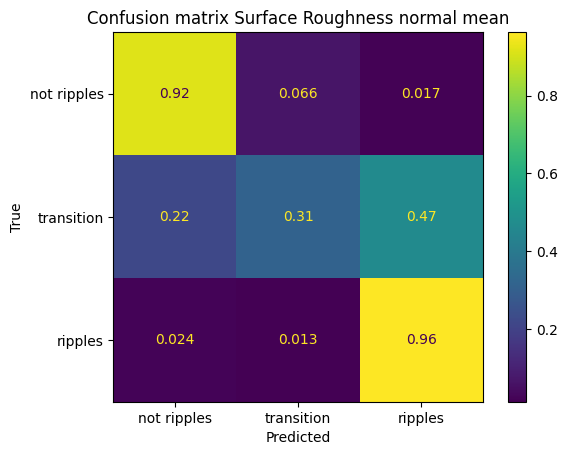

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_weighted_mean, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confusion matrix Surface Roughness mean')
disp.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

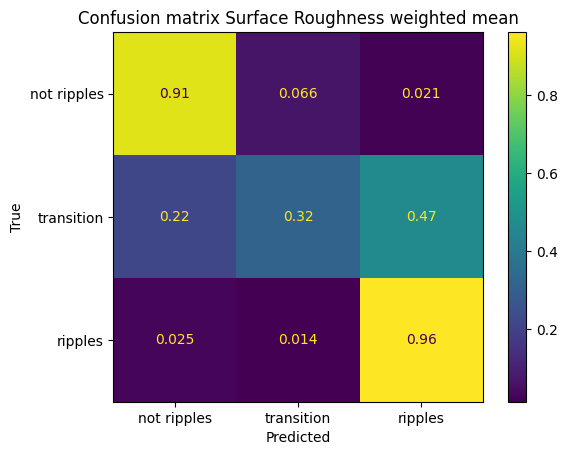

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_weighted_mean, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confusion matrix Surface Roughness weighted mean')
disp.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

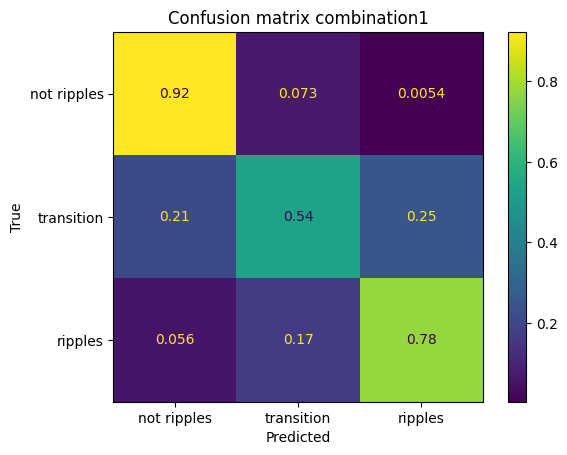

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_weighted_mean, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confusion matrix combination1')
disp.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

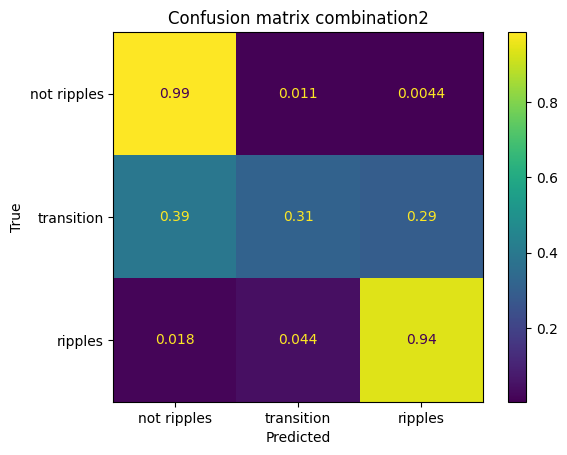

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_weighted_mean, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confusion matrix combination2')
disp.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

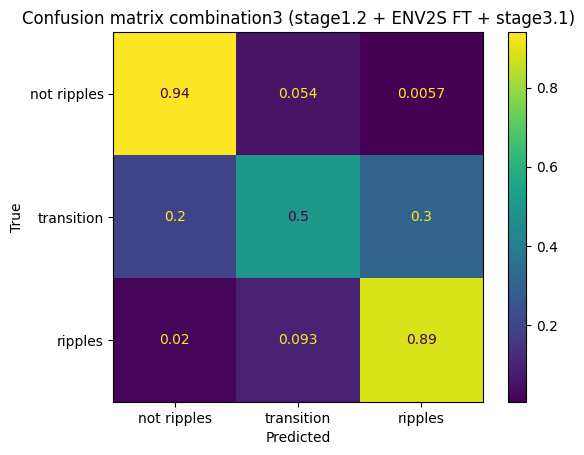

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_weighted_mean, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confusion matrix combination3 (stage1.2 + ENV2S FT + stage3.1)')
disp.ax_.set(xlabel='Predicted', ylabel='True')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

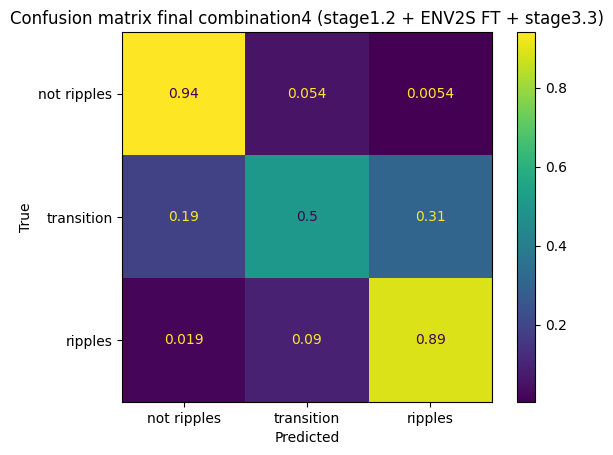

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_weighted_mean, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Confusion matrix final combination4 (stage1.2 + ENV2S FT + stage3.3)')
disp.ax_.set(xlabel='Predicted', ylabel='True')

# Assigning classification values and certainty to tiles

In [17]:
combination1 = final_classification_not_ripples[['col1', 'combination1', '% combination1']]#'final1']]

combination2 = final_classification_not_ripples[['col1', 'combination2', '% combination2']]#'final2']]

combination3 = final_classification_not_ripples[['col1', 'combination3', '% combination3']]#'final3']]

combination4 = final_classification_not_ripples[['col1', 'combination4', '% combination4']]#'final4']]

In [26]:
combination1_NR = combination1[combination1['combination1'] == 'NO']#'final1'] == 'NO']
combination1_NR = combination1_NR.reset_index()

combination2_NR = combination2[combination2['combination2'] == 'NO']#'final2'] == 'NO']
combination2_NR = combination2_NR.reset_index()

combination3_NR = combination3[combination3['combination3'] == 'NO']#'final3'] == 'NO']
combination3_NR = combination3_NR.reset_index()

combination4_NR = combination4[combination4['combination4'] == 'NO']#'final4'] == 'NO']
combination4_NR = combination4_NR.reset_index()

#-----------------------
combination1_T = combination1[combination1['combination1'] == 'T']#'final1'] == 'T']
combination1_T = combination1_T.reset_index()

combination2_T = combination2[combination2['combination2'] == 'T']#'final2'] == 'T']
combination2_T = combination2_T.reset_index()

combination3_T = combination3[combination3['combination3'] == 'T']#'final3'] == 'T']
combination3_T = combination3_T.reset_index()

combination4_T = combination4[combination4['combination4'] == 'T']#'final4'] == 'T']
combination4_T = combination4_T.reset_index()

#-----------------------
combination1_R = combination1[combination1['combination1'] == 'YES']#'final1'] == 'YES']
combination1_R = combination1_R.reset_index()

combination2_R = combination2[combination2['combination2'] == 'YES']#'final2'] == 'YES']
combination2_R = combination2_R.reset_index()

combination3_R = combination3[combination3['combination3'] == 'YES']#'final3'] == 'YES']
combination3_R = combination3_R.reset_index()

combination4_R = combination4[combination4['combination4'] == 'YES']#'final4'] == 'YES']
combination4_R = combination4_R.reset_index()

In [31]:
tile_size = 100
grid = np.zeros_like(mosaic_raw)
certainty_grid = grid.copy()
empty_grid = grid.copy()
for x in range(1,len(combination4)):#combination4_R)):
  tile_name = combination4.at[x, 'col1']#combination4_R.at[x, 'col1']
  splitted = tile_name.split("_")
  row = int(splitted[1]) + 20
  column = int(splitted[3]) + 20
  length = int(np.sqrt(0.36*tile_size**2))
  grid[row:row+length, column:column+length] = mosaic_raw[row:row+length, column:column+length]
  certainty_value = float(final_classification_not_ripples.at[x, '% NR combination4'])#combination4_R.at[x, '% combination4'])
  certainty_grid[row:row+length, column:column+length] = certainty_value
  #empty_grid[row:row+length, column:column+length] = 1

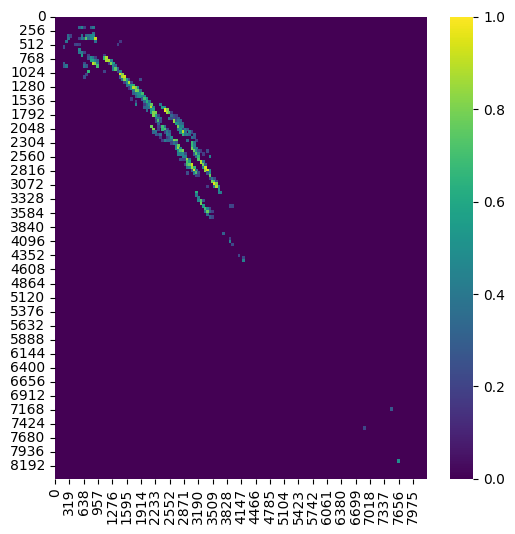

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(certainty_grid, cmap='viridis', vmin=0, vmax=1.0, cbar=True)
fig.savefig(os.path.join(data_dir, 'test.png'))

In [ ]:
orig_cmap = plt.get_cmap('Greys')
cmap_n = orig_cmap.N
derived_cmap = orig_cmap(np.arange(cmap_n))

In [ ]:
empty_grid = empty_grid + 1
empty_grid[empty_grid == 2] = 0

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
sigmoid_cmap = derived_cmap.copy()
x = np.linspace(-10,10,cmap_n)
sigmoid_cmap[:,-1] = np.exp(x)/(np.exp(x) + 1)
sigmoid_cmap = ListedColormap(sigmoid_cmap)

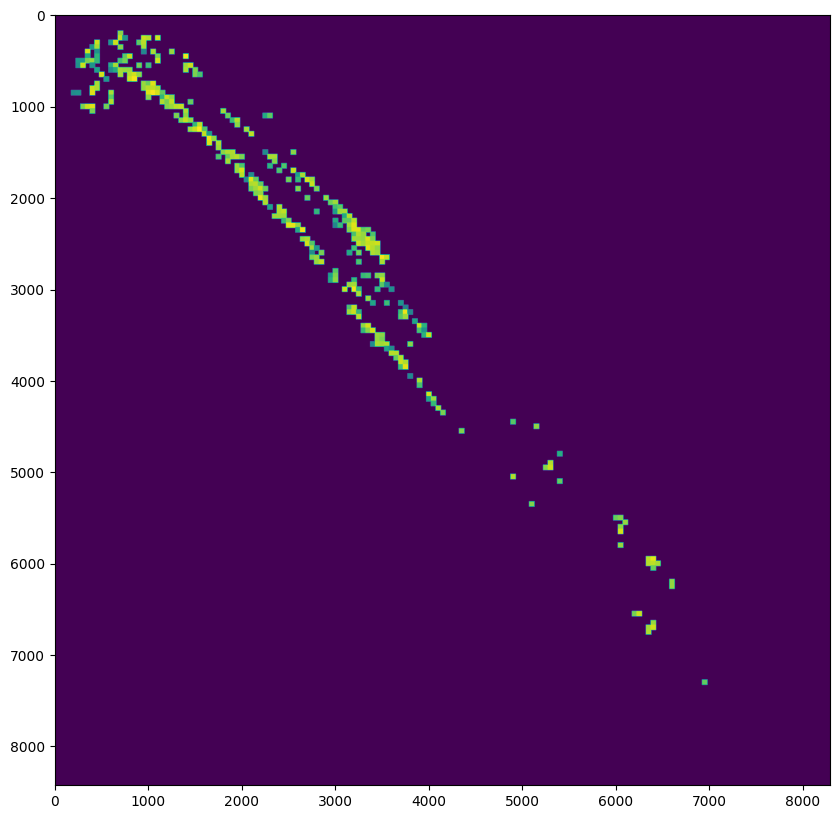

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.imshow(certainty_grid, cmap=cm_3, aspect='auto')
ax = plt.imshow(empty_grid, cmap=sigmoid_cmap, aspect='auto')
#norm = plt.Normalize(vmin=0, vmax=1.0)
#ax = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cm_3))
#fig.savefig(os.path.join(data_dir, 'certainty_line04_50overlap_transition_combination3_weighted_avg.png'))

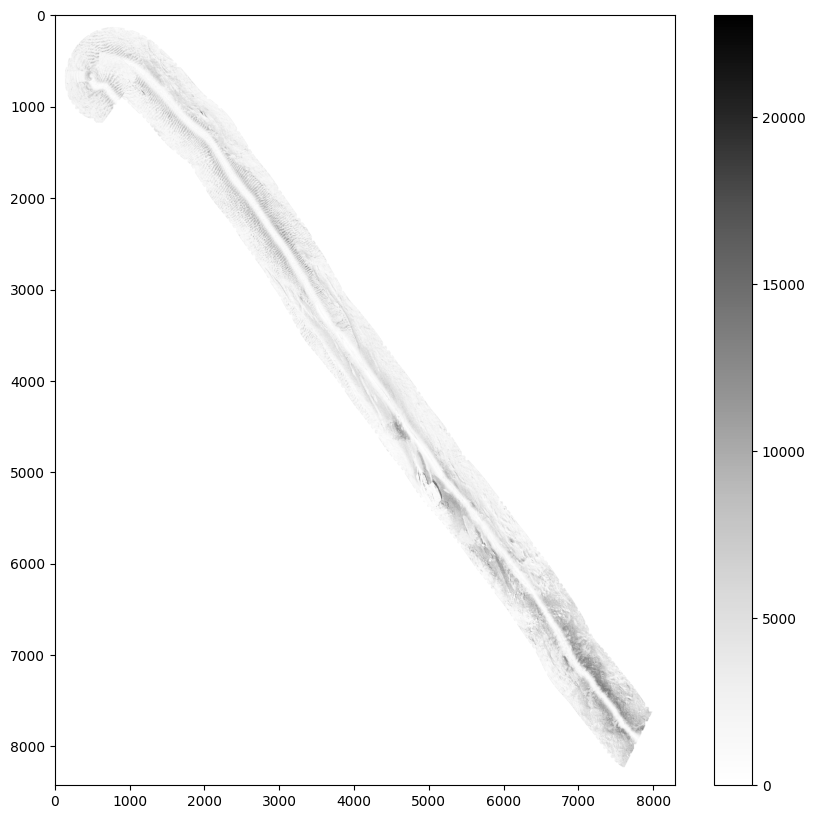

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid, cmap='Greys', aspect='auto')
plt.colorbar(ax)

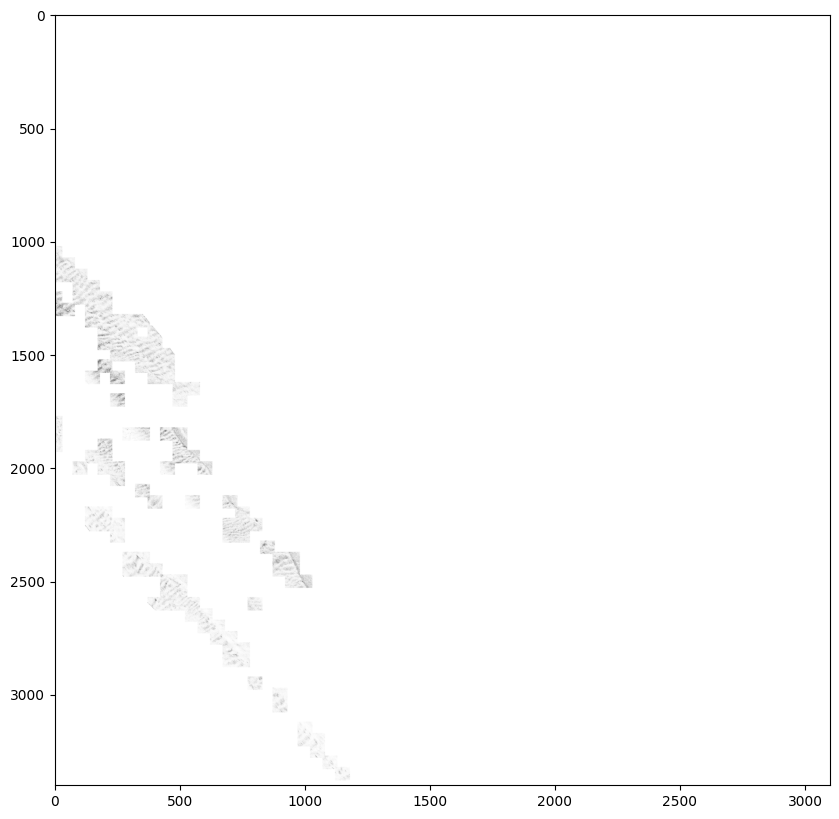

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid[1000:4400,3000:6100], cmap='Greys', aspect='auto')

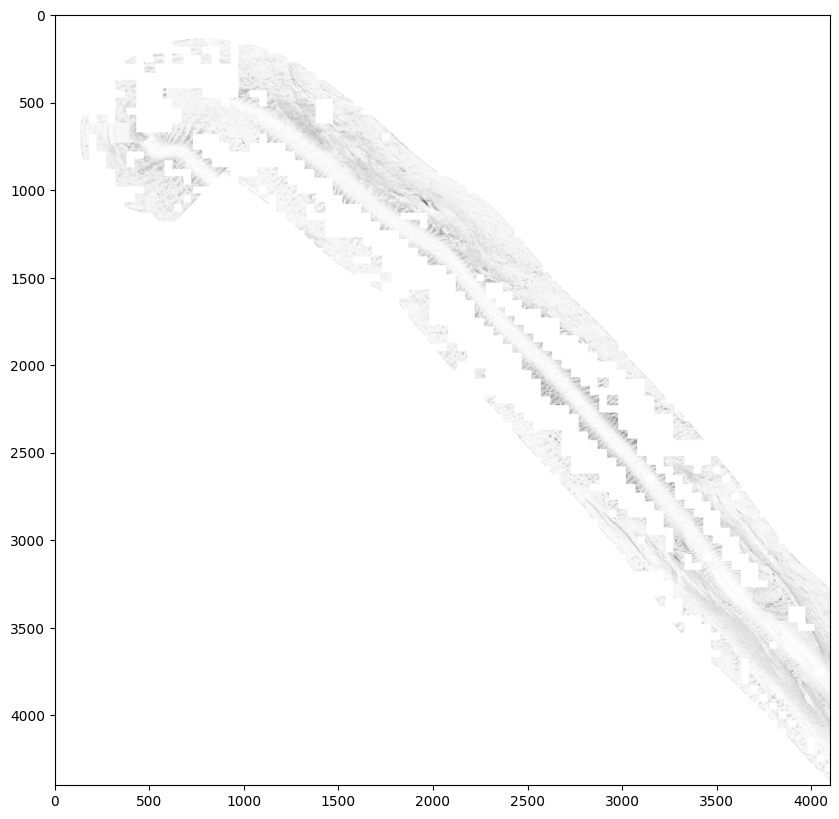

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid[:4400,:4100], cmap='Greys', aspect='auto')

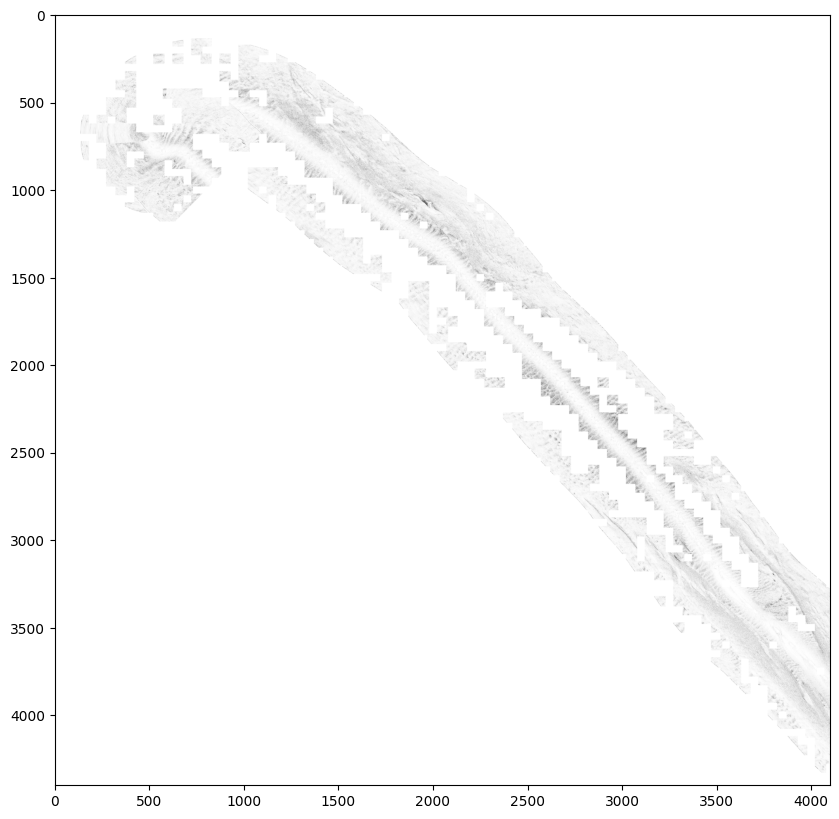

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid[:4400,:4100], cmap='Greys', aspect='auto')

##Save grid as GeoTIFF

In [ ]:
from rasterio.transform import Affine
import rasterio

In [ ]:
def scalar_to_rgb(data):
    #Transform scalar-data to four dimensional RGBA data; the fourth is alpha
    #First we must normalize the data
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    #Map the scalar-data using colormap function from matplotlib
    #The default cmap used by matplotlib is 'viridis', but that can be changed
    #using different cmaps in the function below
    # cm = plt.cm.viridis
    #or a cmap defined by the user
    cm = cm_1
    #cm = plt.cm.gist_rainbow
    #cm = plt.cm.viridis

    rgb_data = cm(norm(data)) #four dimensional matrix
    """
    It is important to note that once the data is saved using a certain cmap,
    it CAN'T be changed when plotting.
    """
    #Now we re-escale the data from 0.0-1.0 float scale, to 0-255 integer scale
    rgb_data = (rgb_data[:,:,:3]*255).astype('uint8')
    # rgb_data = rgb_data.astype('uint8')
    return rgb_data

#save it first as png to create the rgb matrix
# plt.imsave('mosaic_png.png', mosaic, cmap=sss.Color_palette())

# img = cv2.imread('mosaic_png.png')  #cv2 read the images as bgr
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = scalar_to_rgb(grid)

file_x = 'XSMOOTH_UTM.txt'
file_y= 'YSMOOTH_UTM.txt'
x_utm = pd.read_csv(os.path.join(data_dir, file_x), sep=",")
y_utm = pd.read_csv(os.path.join(data_dir, file_y), sep=",")
x_utm = x_utm.to_numpy()
y_utm = y_utm.to_numpy()


res_x = 0.2
res_y = 0.2
X = np.arange(np.min(x_utm)-100, np.max(x_utm)+100, res_x)
Y = np.arange(np.min(y_utm)-100, np.max(y_utm)+100, res_y)
transform = Affine.translation(np.min(X) - res_x / 2, np.min(Y) - res_y / 2) * Affine.scale(res_x, res_y)
#reshape img to save as geotiff
#goes from [height,width,bands] to [bands, height, width]
image = np.moveaxis(img_rgb.squeeze(),-1,0)
new_dataset = rasterio.open(
    os.path.join(data_dir,'Line04_not_ripples_weighted_avg_V2.tif'),
    'w',
    driver='GTiff',
    height=grid.shape[0],
    width=grid.shape[1],
    count=3,
    dtype=img_rgb.dtype,
    crs='EPSG:32610',
    transform=transform,
)
new_dataset.write(image)
new_dataset.close()